# Packages

In [115]:
# import packages

import numpy as np
import pandas as pd
import math
from pandas import value_counts
from pandas.api.types import is_numeric_dtype
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler, Normalizer, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
import warnings

import category_encoders as ce 

from xgboost import XGBRegressor
import random

from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, LogisticRegression, LinearRegression

In [209]:
# bonus

from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Data Exploration

In [2]:
train = pd.read_csv('C2T2_Train.csv')
test = pd.read_csv('C2T2_Test.csv')

In [3]:
train.head()

,ID,PageLikes,PageCheckIns,DailyInterest,PageCategory,PageCC1Min,PageCC1Max,PageCC1Avg,PageCC1Median,PageCC1Std,...,Published_Friday,Published_Saturday,PredictOn_Sunday,PredictOn_Monday,PredictOn_Tuesday,PredictOn_Wednesday,PredictOn_Thursday,PredictOn_Friday,PredictOn_Saturday,CommentsNumber
0,1,634995,0,463,1,0,1280,13.158779,1.0,94.99364,...,0,0,0,0,0,0,1,0,0,0
1,2,634995,0,463,1,0,1280,13.158779,1.0,94.99364,...,0,0,1,0,0,0,0,0,0,0
2,3,634995,0,463,1,0,1280,13.158779,1.0,94.99364,...,1,0,0,0,0,0,0,0,1,0
3,4,634995,0,463,1,0,1280,13.158779,1.0,94.99364,...,1,0,0,1,0,0,0,0,0,0
4,5,634995,0,463,1,0,1280,13.158779,1.0,94.99364,...,0,0,0,0,0,0,1,0,0,0


In [4]:
test.head()

,ID,PageLikes,PageCheckIns,DailyInterest,PageCategory,PageCC1Min,PageCC1Max,PageCC1Avg,PageCC1Median,PageCC1Std,...,Published_Friday,Published_Saturday,PredictOn_Sunday,PredictOn_Monday,PredictOn_Tuesday,PredictOn_Wednesday,PredictOn_Thursday,PredictOn_Friday,PredictOn_Saturday,CommentsNumber
0,130000,879585,11,49540,9,0,1063,102.595311,43.0,173.796629,...,0,0,0,0,0,0,1,0,0,NaN
1,130001,879585,11,49540,9,0,1063,102.595311,43.0,173.796629,...,0,0,0,0,0,0,0,1,0,NaN
2,130002,879585,11,49540,9,0,1063,102.595311,43.0,173.796629,...,0,0,0,0,0,0,1,0,0,NaN
3,130003,879585,11,49540,9,0,1063,102.595311,43.0,173.796629,...,0,0,0,0,0,0,1,0,0,NaN
4,130004,879585,11,49540,9,0,1063,102.595311,43.0,173.796629,...,0,0,0,0,0,0,1,0,0,NaN


In [5]:
train.shape

(129999, 55)

In [6]:
# check missing value sort by desending sequence
missing_value = train.isnull().sum().sort_values(ascending = False)
missing_value_list = missing_value.index.where(missing_value > 0).dropna().tolist()
missing_value[:10]

CommentsNumber    0
PageCC2Median     0
PageCC4Std        0
PageCC4Median     0
PageCC4Avg        0
PageCC4Max        0
PageCC4Min        0
PageCC3Std        0
PageCC3Median     0
PageCC3Avg        0
dtype: int64

No missing values. Then check data types

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129999 entries, 0 to 129998
Data columns (total 55 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ID                       129999 non-null  int64  
 1   PageLikes                129999 non-null  int64  
 2   PageCheckIns             129999 non-null  int64  
 3   DailyInterest            129999 non-null  int64  
 4   PageCategory             129999 non-null  int64  
 5   PageCC1Min               129999 non-null  int64  
 6   PageCC1Max               129999 non-null  int64  
 7   PageCC1Avg               129999 non-null  float64
 8   PageCC1Median            129999 non-null  float64
 9   PageCC1Std               129999 non-null  float64
 10  PageCC2Min               129999 non-null  int64  
 11  PageCC2Max               129999 non-null  int64  
 12  PageCC2Avg               129999 non-null  float64
 13  PageCC2Median            129999 non-null  float64
 14  Page

All of them are integer/float types. Go back to the definition of words, column PageCategory which should be categorical nominal, convert it to categorical type. 

In [8]:
train['PageCategory'] = train['PageCategory'].astype('str')
test['PageCategory'] = test['PageCategory'].astype('str')

In [9]:
# number of unique values
train.nunique().sort_values(ascending = False)

ID                         129999
CC2MinusCC3_CC5              1625
TotalComments_CC1            1367
PostLength                   1286
PostShareCount               1261
CommentsFirst24H_CC4         1050
CommentsLast48to24H_CC3       891
CommentsLast24H_CC2           890
CommentsNumber                526
PageLikes                     426
PageCC1Std                    413
PageCC5Std                    412
PageCC4Avg                    411
PageCC1Avg                    411
PageCC2Std                    411
PageCC4Std                    410
PageCC3Std                    409
PageCC3Avg                    407
PageCC2Avg                    406
PageCC5Avg                    400
DailyInterest                 349
PageCC1Max                    263
PageCC4Max                    262
PageCC3Max                    253
PageCC2Max                    251
PageCC5Max                    249
PageCC5Min                    239
PageCC1Median                 145
PageCC4Median                 141
PageCheckIns  

ID which is meaningless since each value are unique. Accordin to unique values, draw graphs and treat them differently.

In [10]:
del train['ID']
del test['ID']

Data exploration for target column

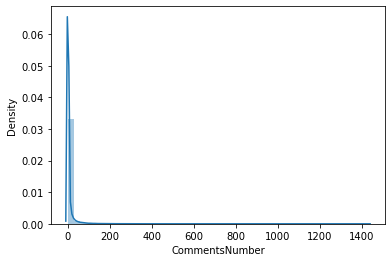

In [182]:
sns.distplot(train['CommentsNumber'])

(0.0, 30.0)

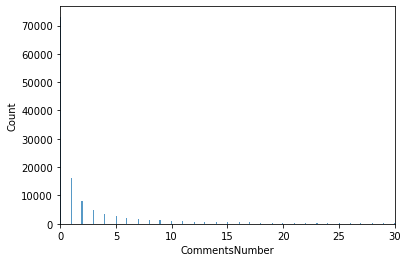

In [188]:
sns.histplot(train['CommentsNumber'])
plt.xlim(0, 30)

(0.0, 1000.0)

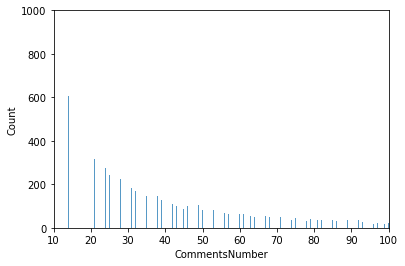

In [190]:
sns.histplot(train['CommentsNumber'])
plt.xlim(10, 100)
plt.ylim(0,1000)

In [185]:
train[train['CommentsNumber'] < 10]

,col_0,col_1,col_2,col_3,col_4,col_5,PageLikes,PageCheckIns,DailyInterest,PageCC1Max,...,Published_Friday,Published_Saturday,PredictOn_Sunday,PredictOn_Monday,PredictOn_Tuesday,PredictOn_Wednesday,PredictOn_Thursday,PredictOn_Friday,PredictOn_Saturday,CommentsNumber
0,0,1,0,0,0,0,0.402535,0.000000,-0.096438,1.458503,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0.402535,0.000000,-0.096438,1.458503,...,0,0,1,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0.402535,0.000000,-0.096438,1.458503,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0.402535,0.000000,-0.096438,1.458503,...,1,0,0,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0.402535,0.000000,-0.096438,1.458503,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129994,0,0,1,0,0,0,0.656214,0.142857,1.111551,1.163265,...,0,0,0,0,0,0,0,1,0,0
129995,0,0,1,0,0,0,0.656214,0.142857,1.111551,1.163265,...,0,0,0,0,0,1,0,0,0,0
129996,0,0,1,0,0,0,0.656214,0.142857,1.111551,1.163265,...,0,0,0,0,0,0,1,0,0,0
129997,0,0,1,0,0,0,0.656214,0.142857,1.111551,1.163265,...,0,0,0,0,0,0,0,0,1,0


Data Exploration for other columns

In [11]:
unique = pd.DataFrame(train.nunique())

# when unique vlaue > 50, put these columns as group 1
unique_group_1 = unique.index[unique[0] > 50].tolist()

# when unique value > 5 and <= 50, put these columns as group 2
unique_group_2 = unique.index[(unique[0] > 5) & (unique[0] <= 50)].tolist()

# when unique value <= 5, put these columns as group 3
unique_group_3 = unique.index[unique[0] <= 5].tolist()

In [12]:
print('group1 columns: ',unique_group_1)
print('\ngroup2 columns: ',unique_group_2)
print('\ngroup3 columns: ',unique_group_3)

group1 columns:  ['PageLikes', 'PageCheckIns', 'DailyInterest', 'PageCategory', 'PageCC1Max', 'PageCC1Avg', 'PageCC1Median', 'PageCC1Std', 'PageCC2Max', 'PageCC2Avg', 'PageCC2Median', 'PageCC2Std', 'PageCC3Max', 'PageCC3Avg', 'PageCC3Median', 'PageCC3Std', 'PageCC4Max', 'PageCC4Avg', 'PageCC4Median', 'PageCC4Std', 'PageCC5Min', 'PageCC5Max', 'PageCC5Avg', 'PageCC5Median', 'PageCC5Std', 'TotalComments_CC1', 'CommentsLast24H_CC2', 'CommentsLast48to24H_CC3', 'CommentsFirst24H_CC4', 'CC2MinusCC3_CC5', 'TimeSincePublishedinHrs', 'PostLength', 'PostShareCount', 'CommentsNumber']

group2 columns:  ['PageCC1Min', 'PageCC2Min', 'PageCC4Min', 'PredictAfterHrs']

group3 columns:  ['PageCC3Min', 'PostPromoted', 'Published_Sunday', 'Published_Monday', 'Published_Tuesday', 'Published_Wednesday', 'Published_Thursday', 'Published_Friday', 'Published_Saturday', 'PredictOn_Sunday', 'PredictOn_Monday', 'PredictOn_Tuesday', 'PredictOn_Wednesday', 'PredictOn_Thursday', 'PredictOn_Friday', 'PredictOn_Saturd

Countplot for group3 and group2

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-

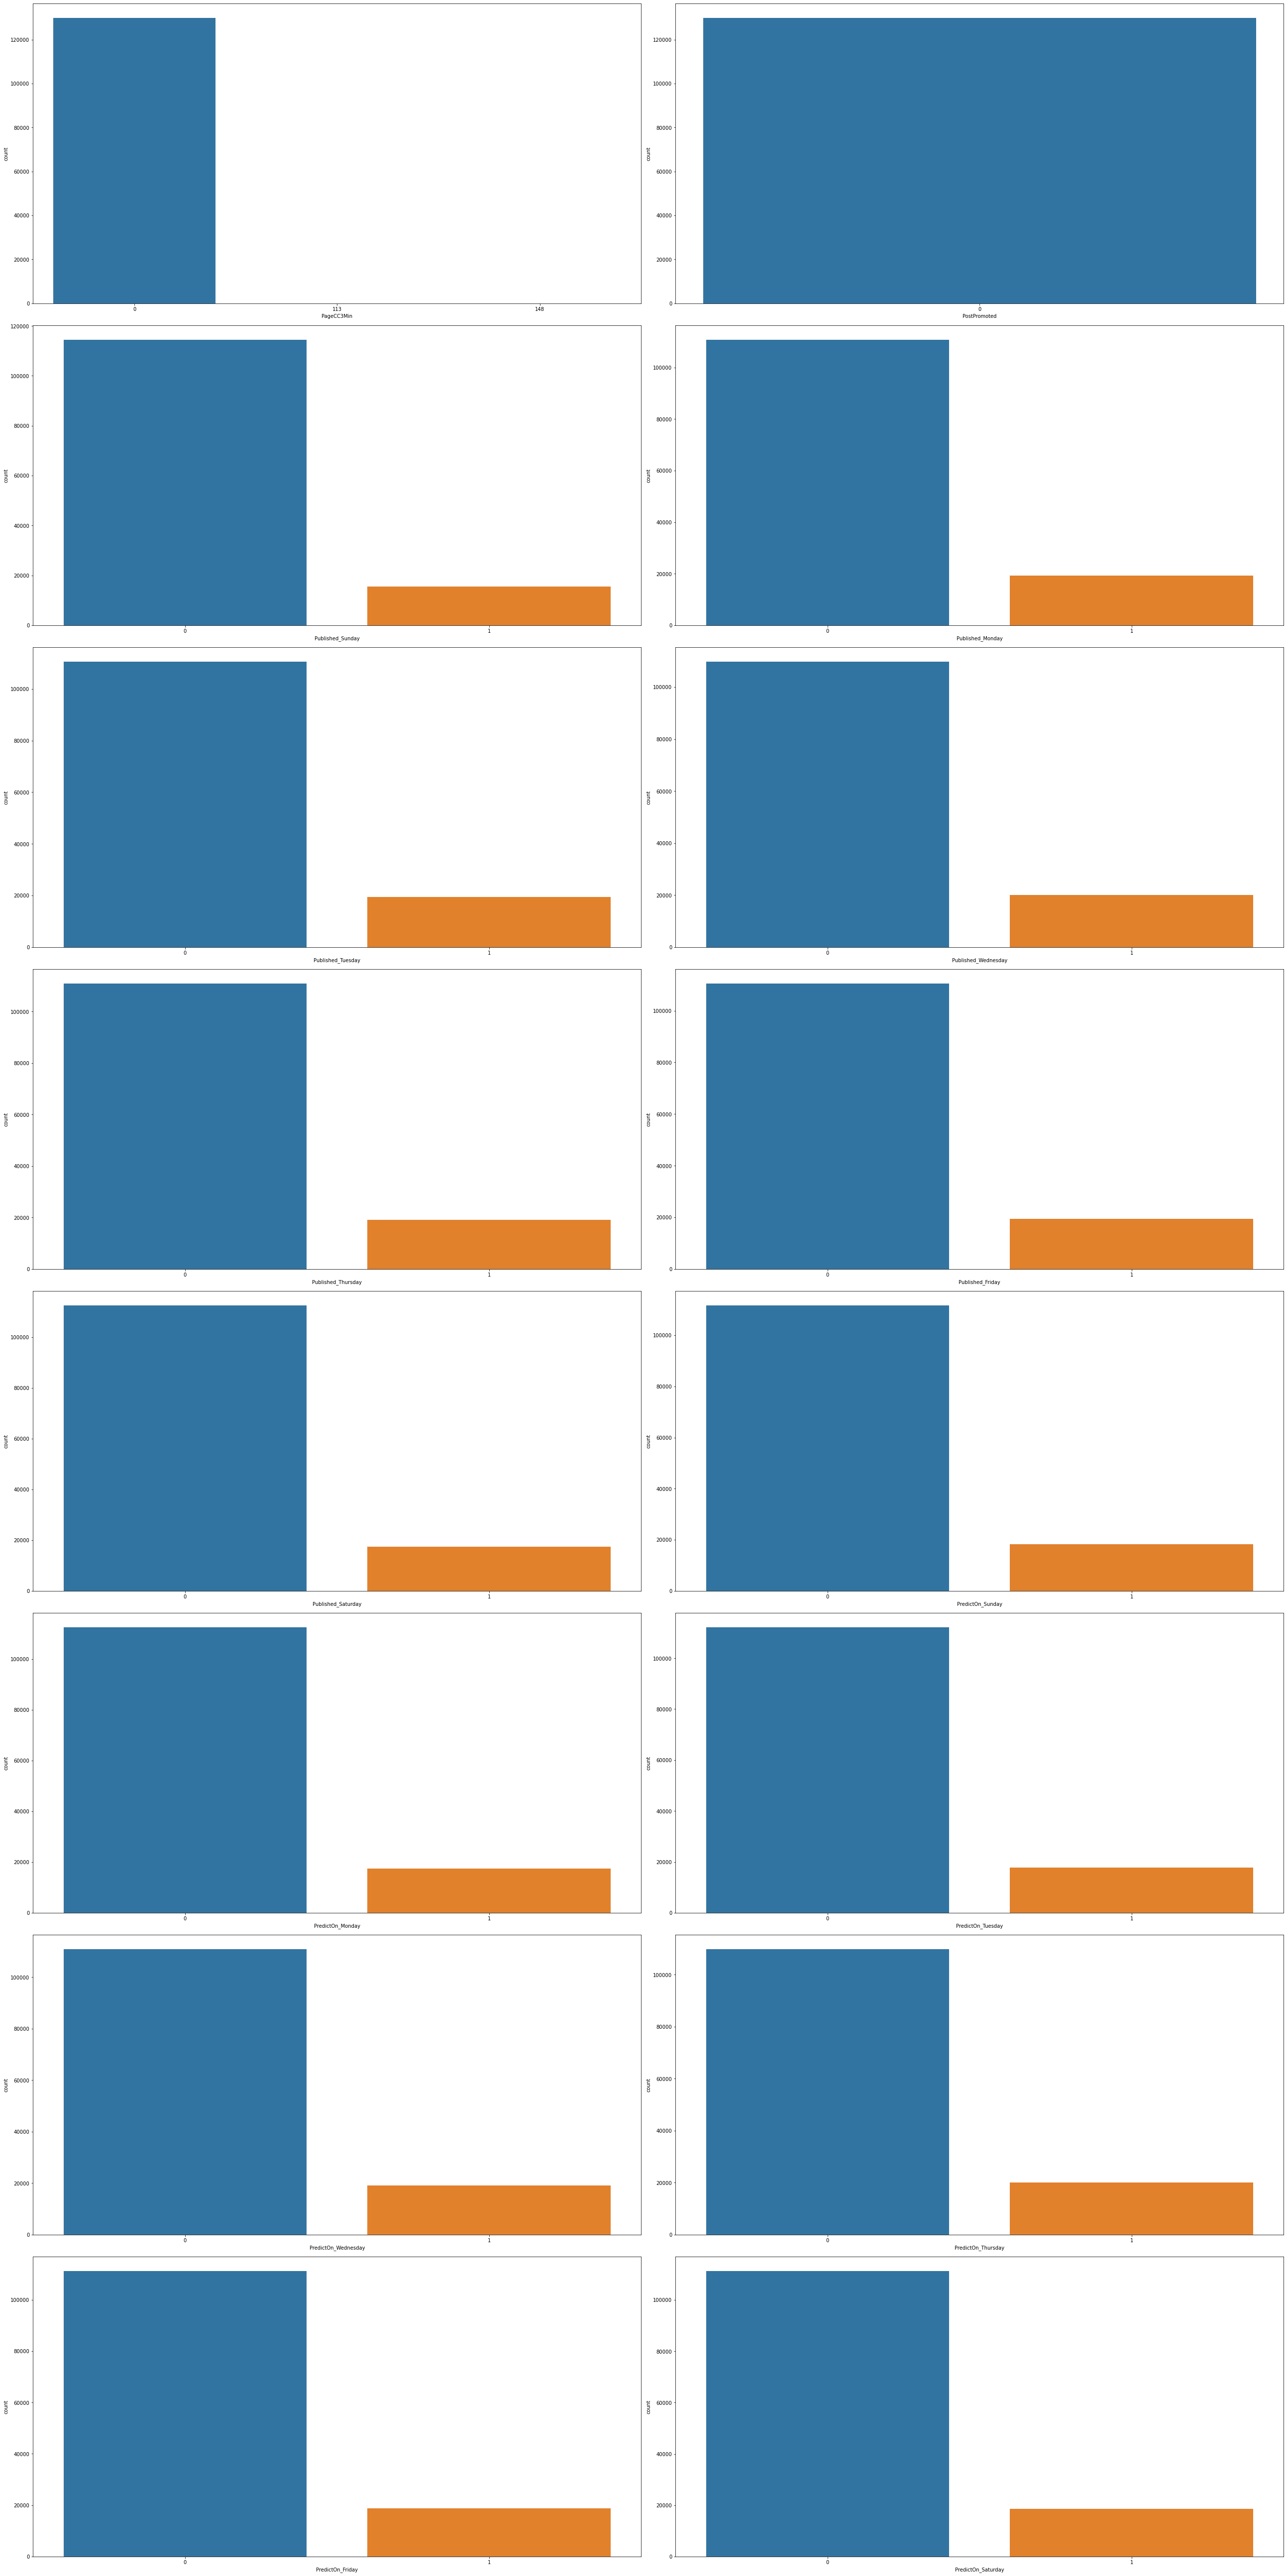

In [13]:
fig = plt.figure(figsize=(36,72))
for index,col in enumerate(unique_group_3):
    plt.subplot(8,2,index+1)
    sns.countplot(train[unique_group_3].loc[:,col])
fig.tight_layout(pad=1.0)

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-

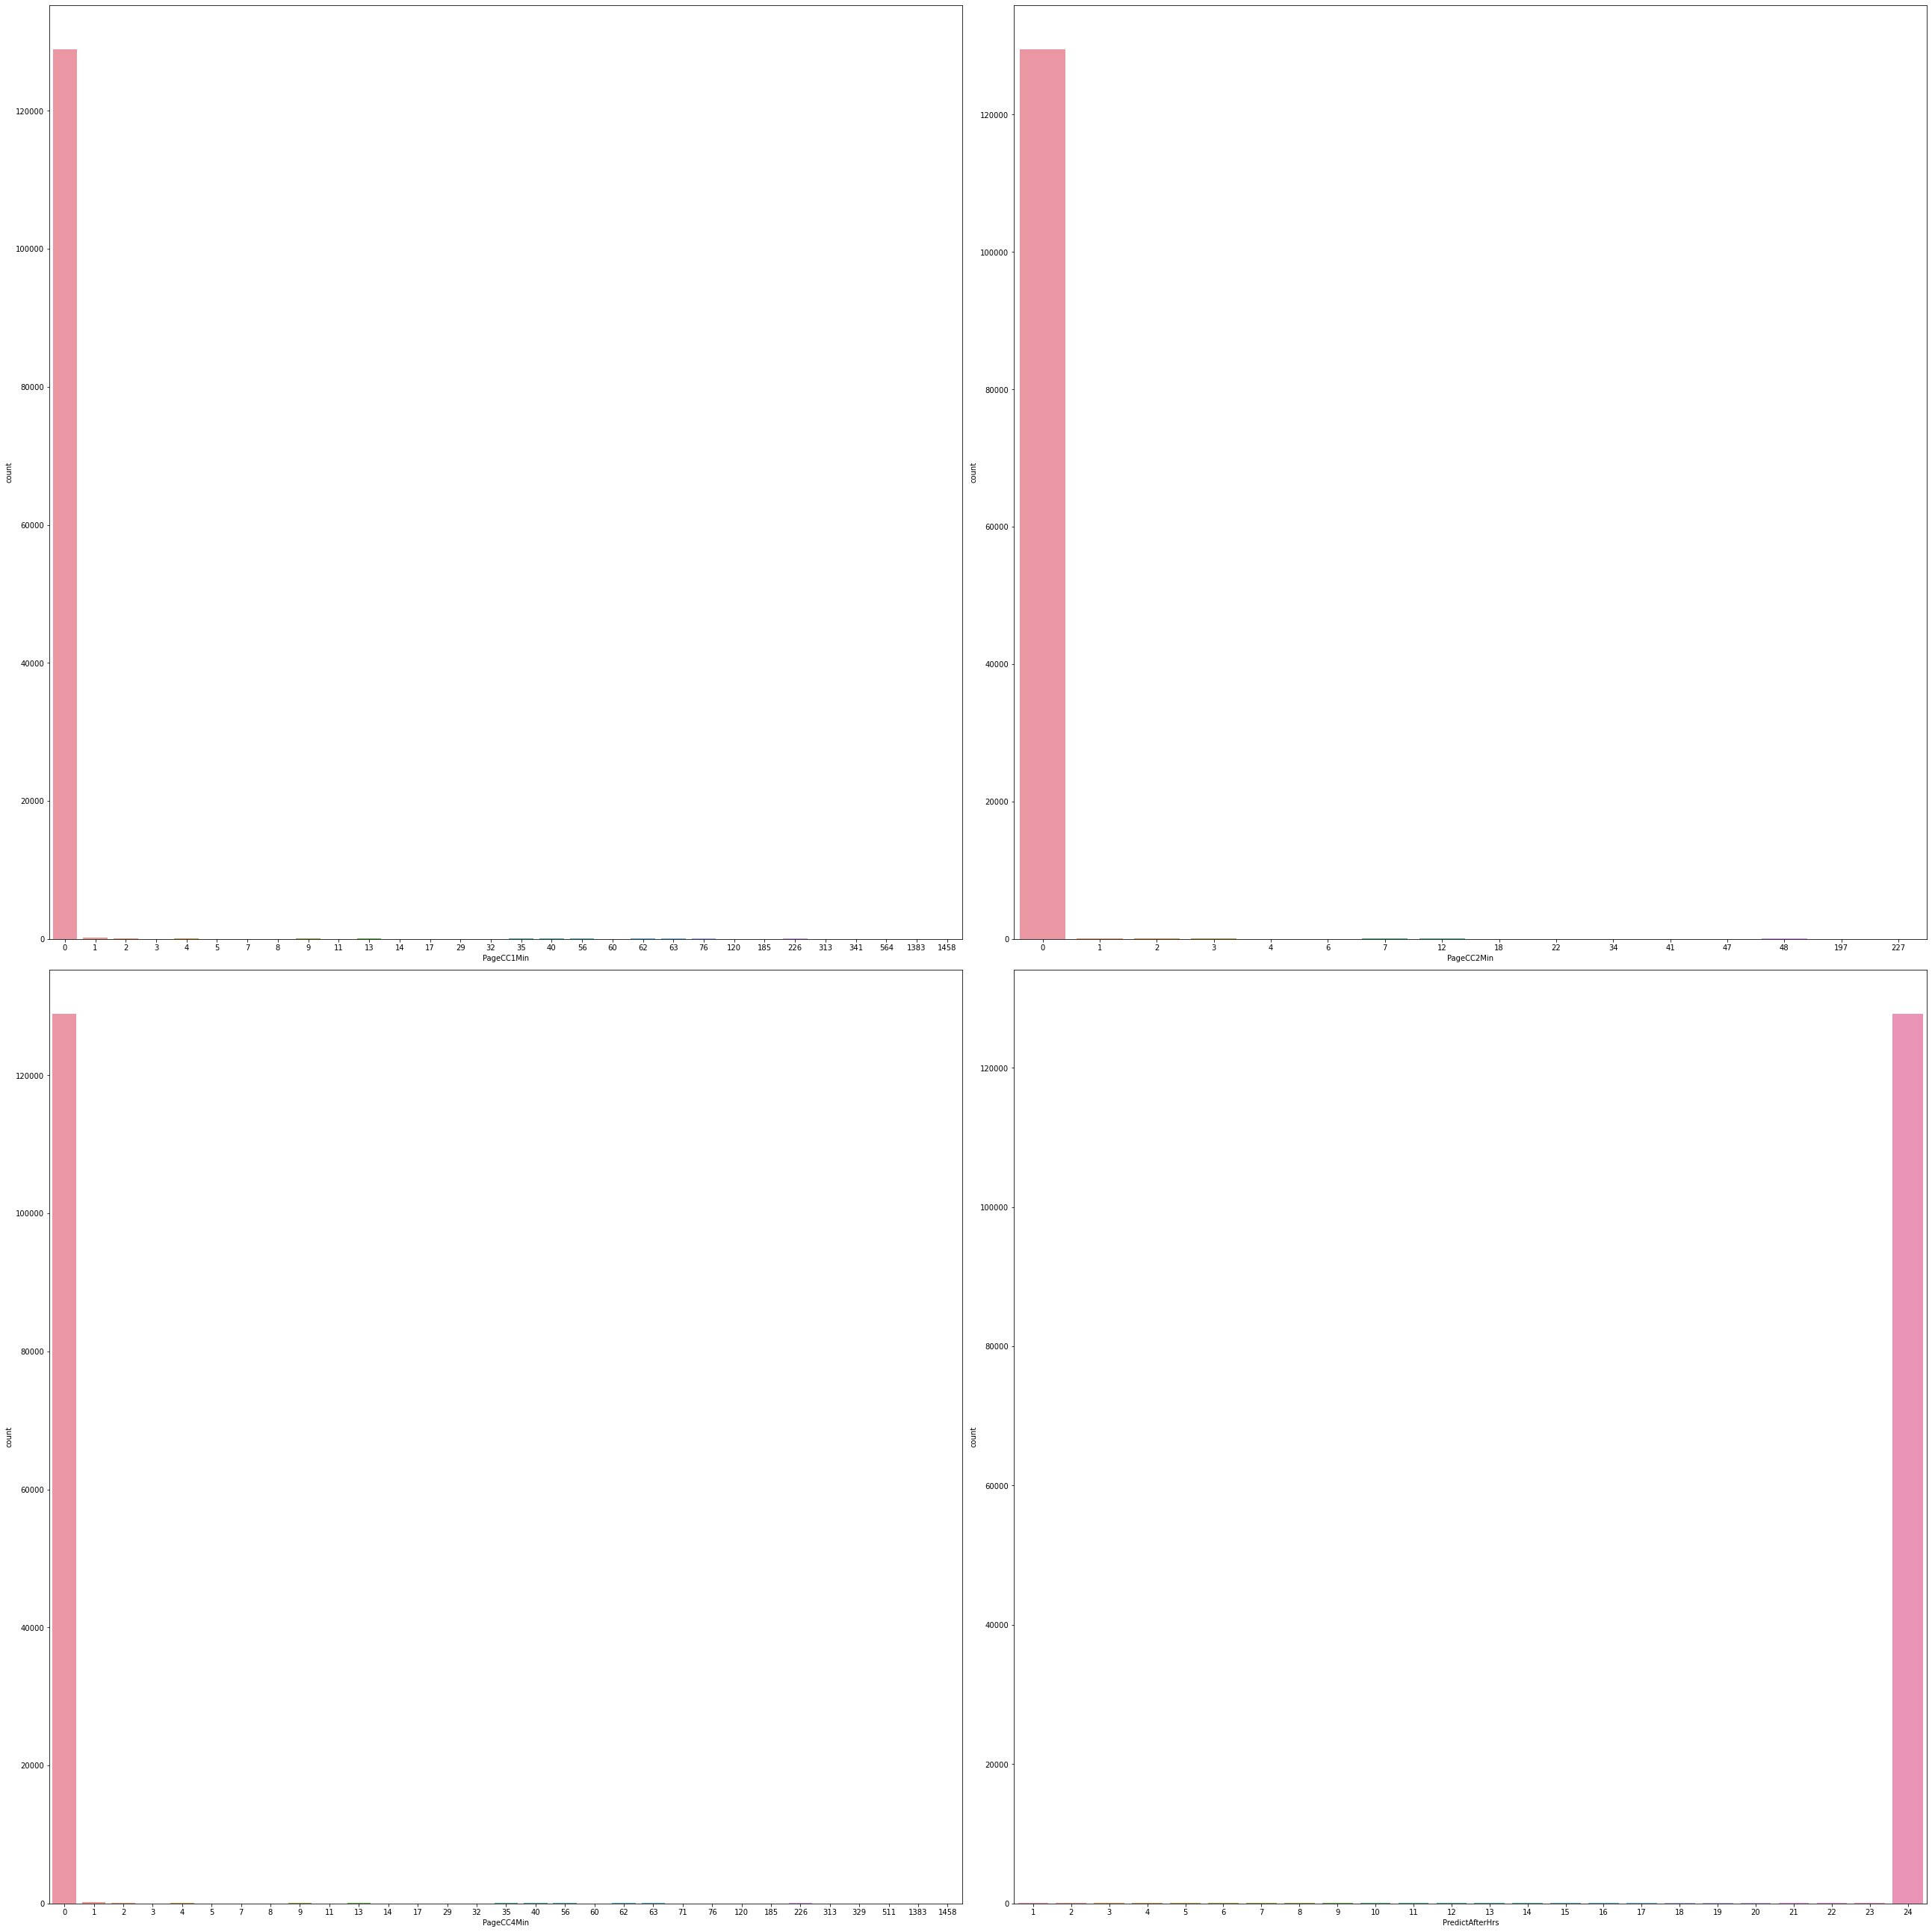

In [14]:
fig = plt.figure(figsize=(36,36))
for index,col in enumerate(unique_group_2):
    plt.subplot(2,2,index+1)
    sns.countplot(train[unique_group_2].loc[:,col])
fig.tight_layout(pad=1.0)

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-

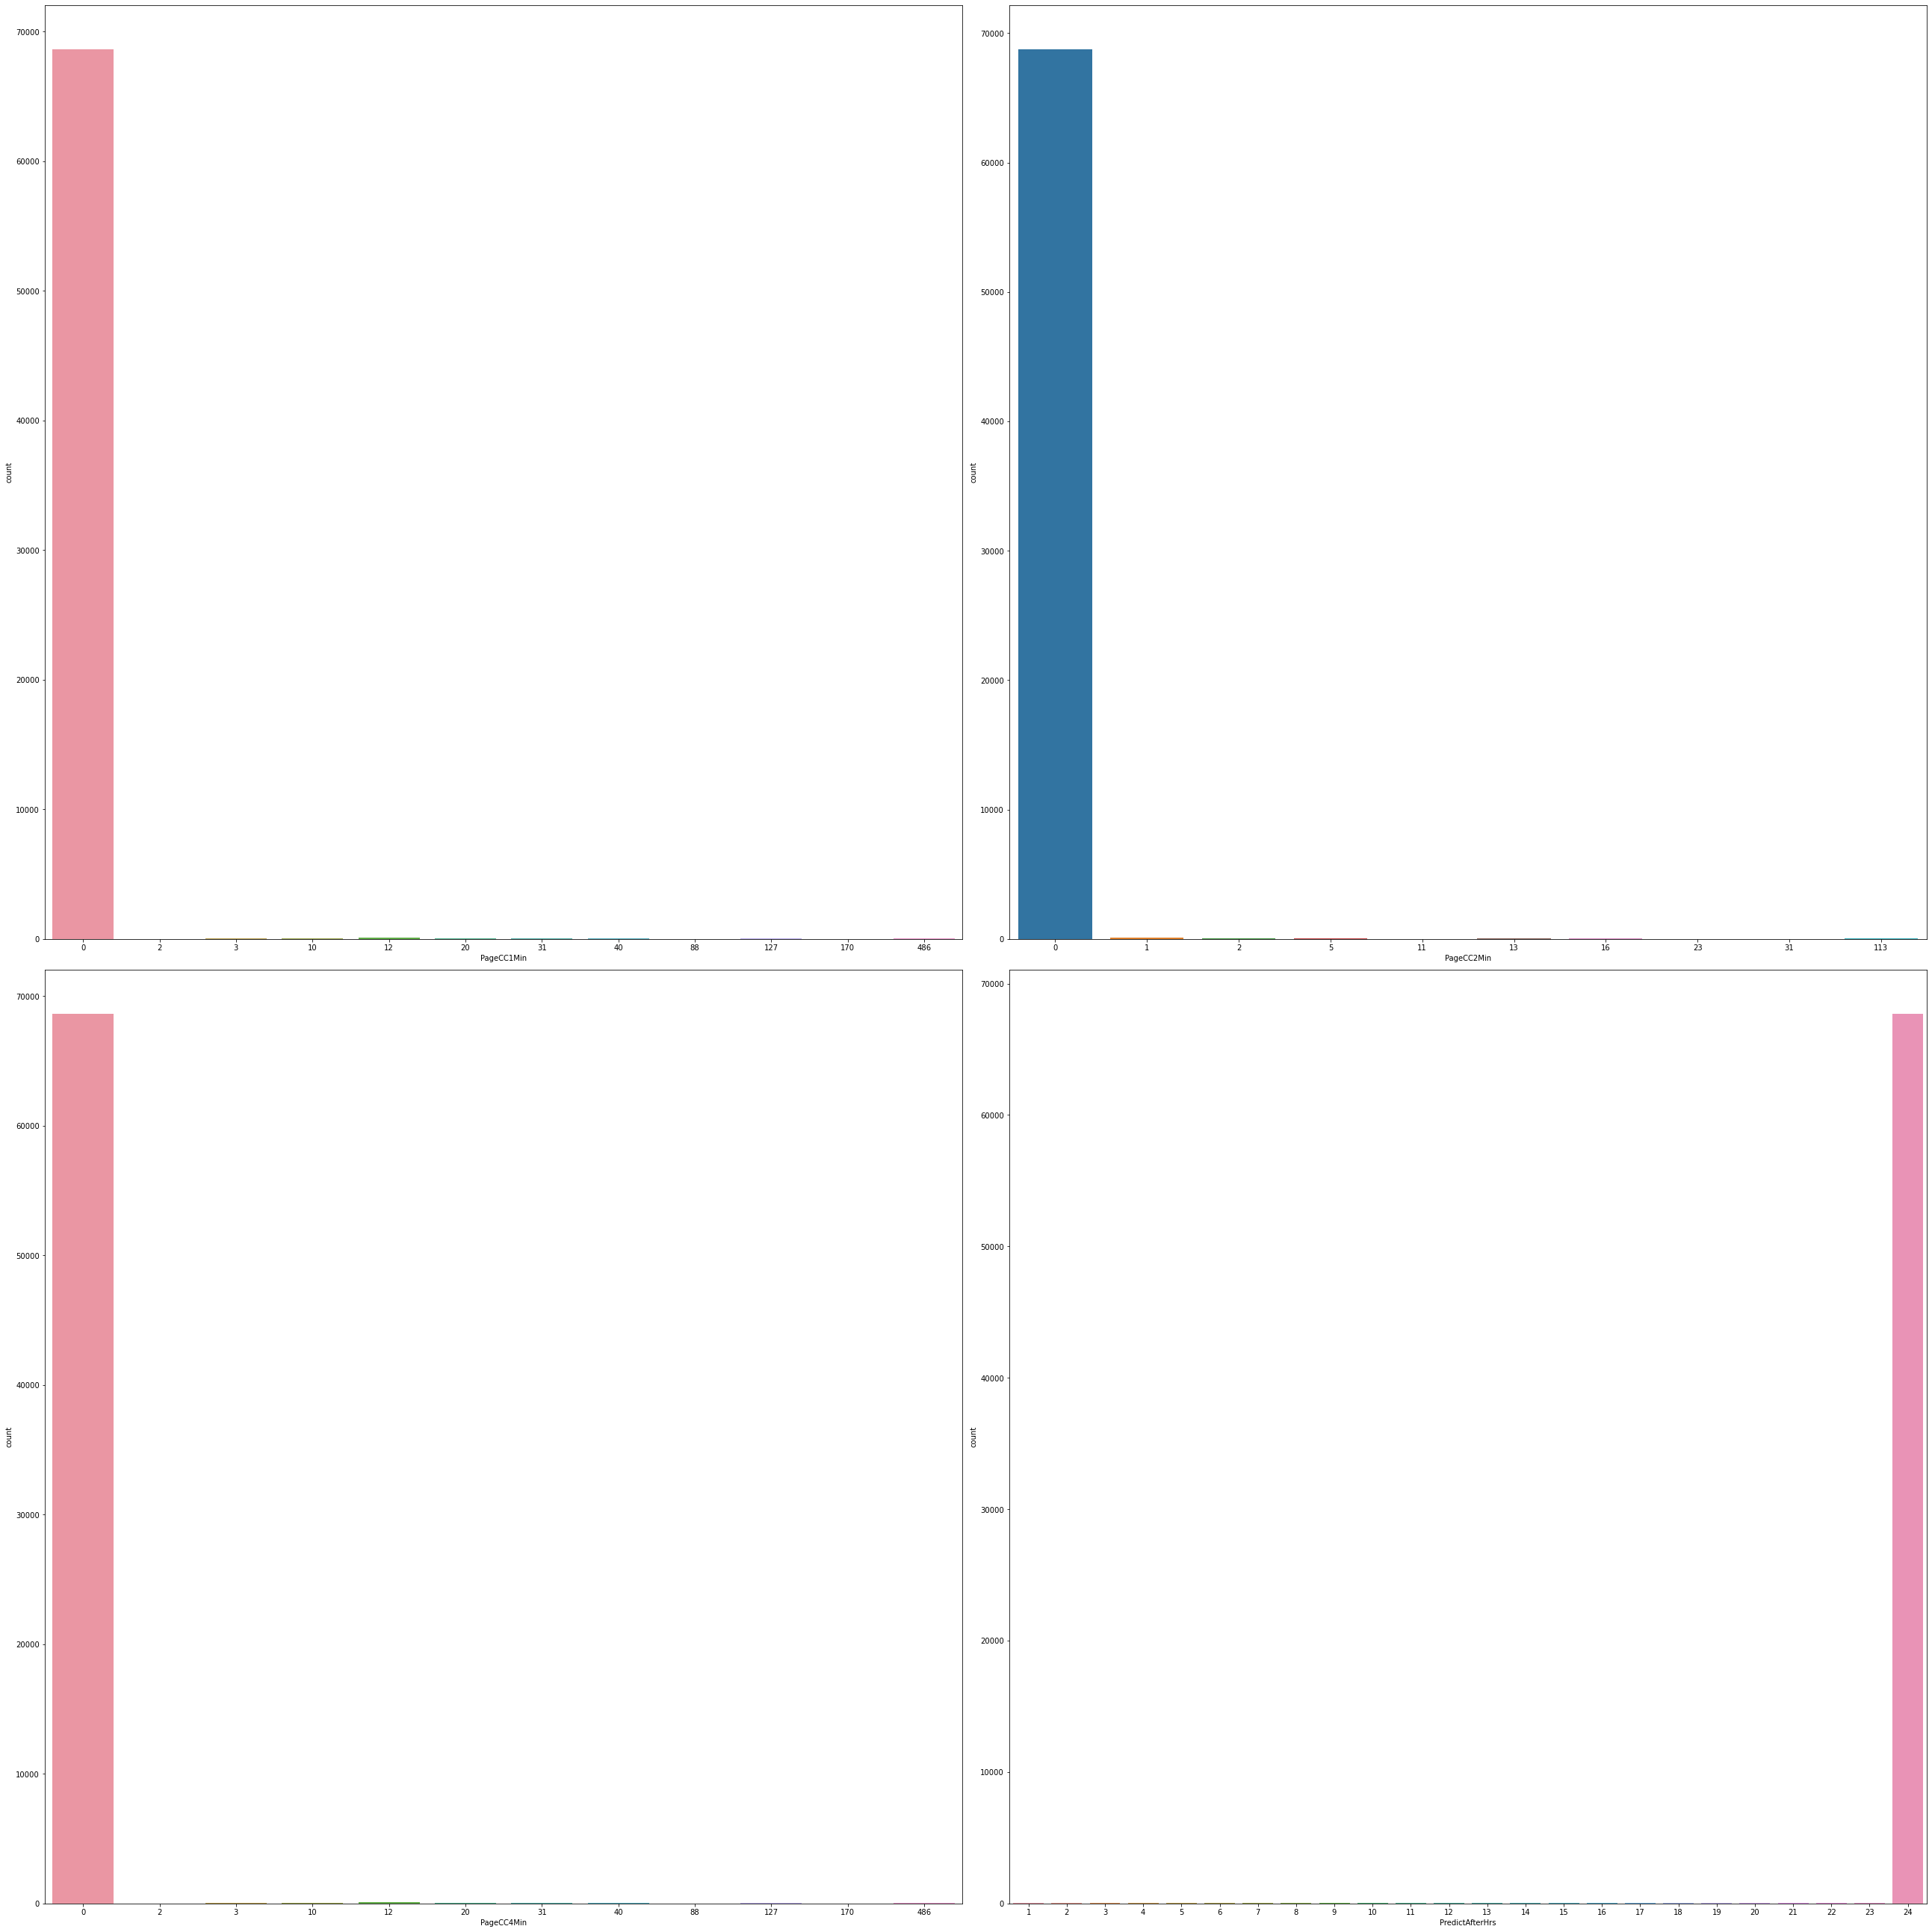

In [15]:
fig = plt.figure(figsize=(36,36))
for index,col in enumerate(unique_group_2):
    plt.subplot(2,2,index+1)
    sns.countplot(test[unique_group_2].loc[:,col])
fig.tight_layout(pad=1.0)

We found that some columns has too many values belongs to one categoric class.

In [16]:
# find all columns with too many values belongs to one categoric class. (>99%)
del_list = []
for col in train.columns.tolist():
    if train[col].value_counts(ascending = False).reset_index()[col][0]/len(train) > 0.99:
        del_list +=[col]
del_list

['PageCC1Min', 'PageCC2Min', 'PageCC3Min', 'PageCC4Min', 'PostPromoted']

In [17]:
train.drop(del_list, axis = 1, inplace = True)
test.drop(del_list, axis = 1, inplace = True)

Histogram for group1

In [18]:
len(unique_group_1)

34

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

C:\Users\24937\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

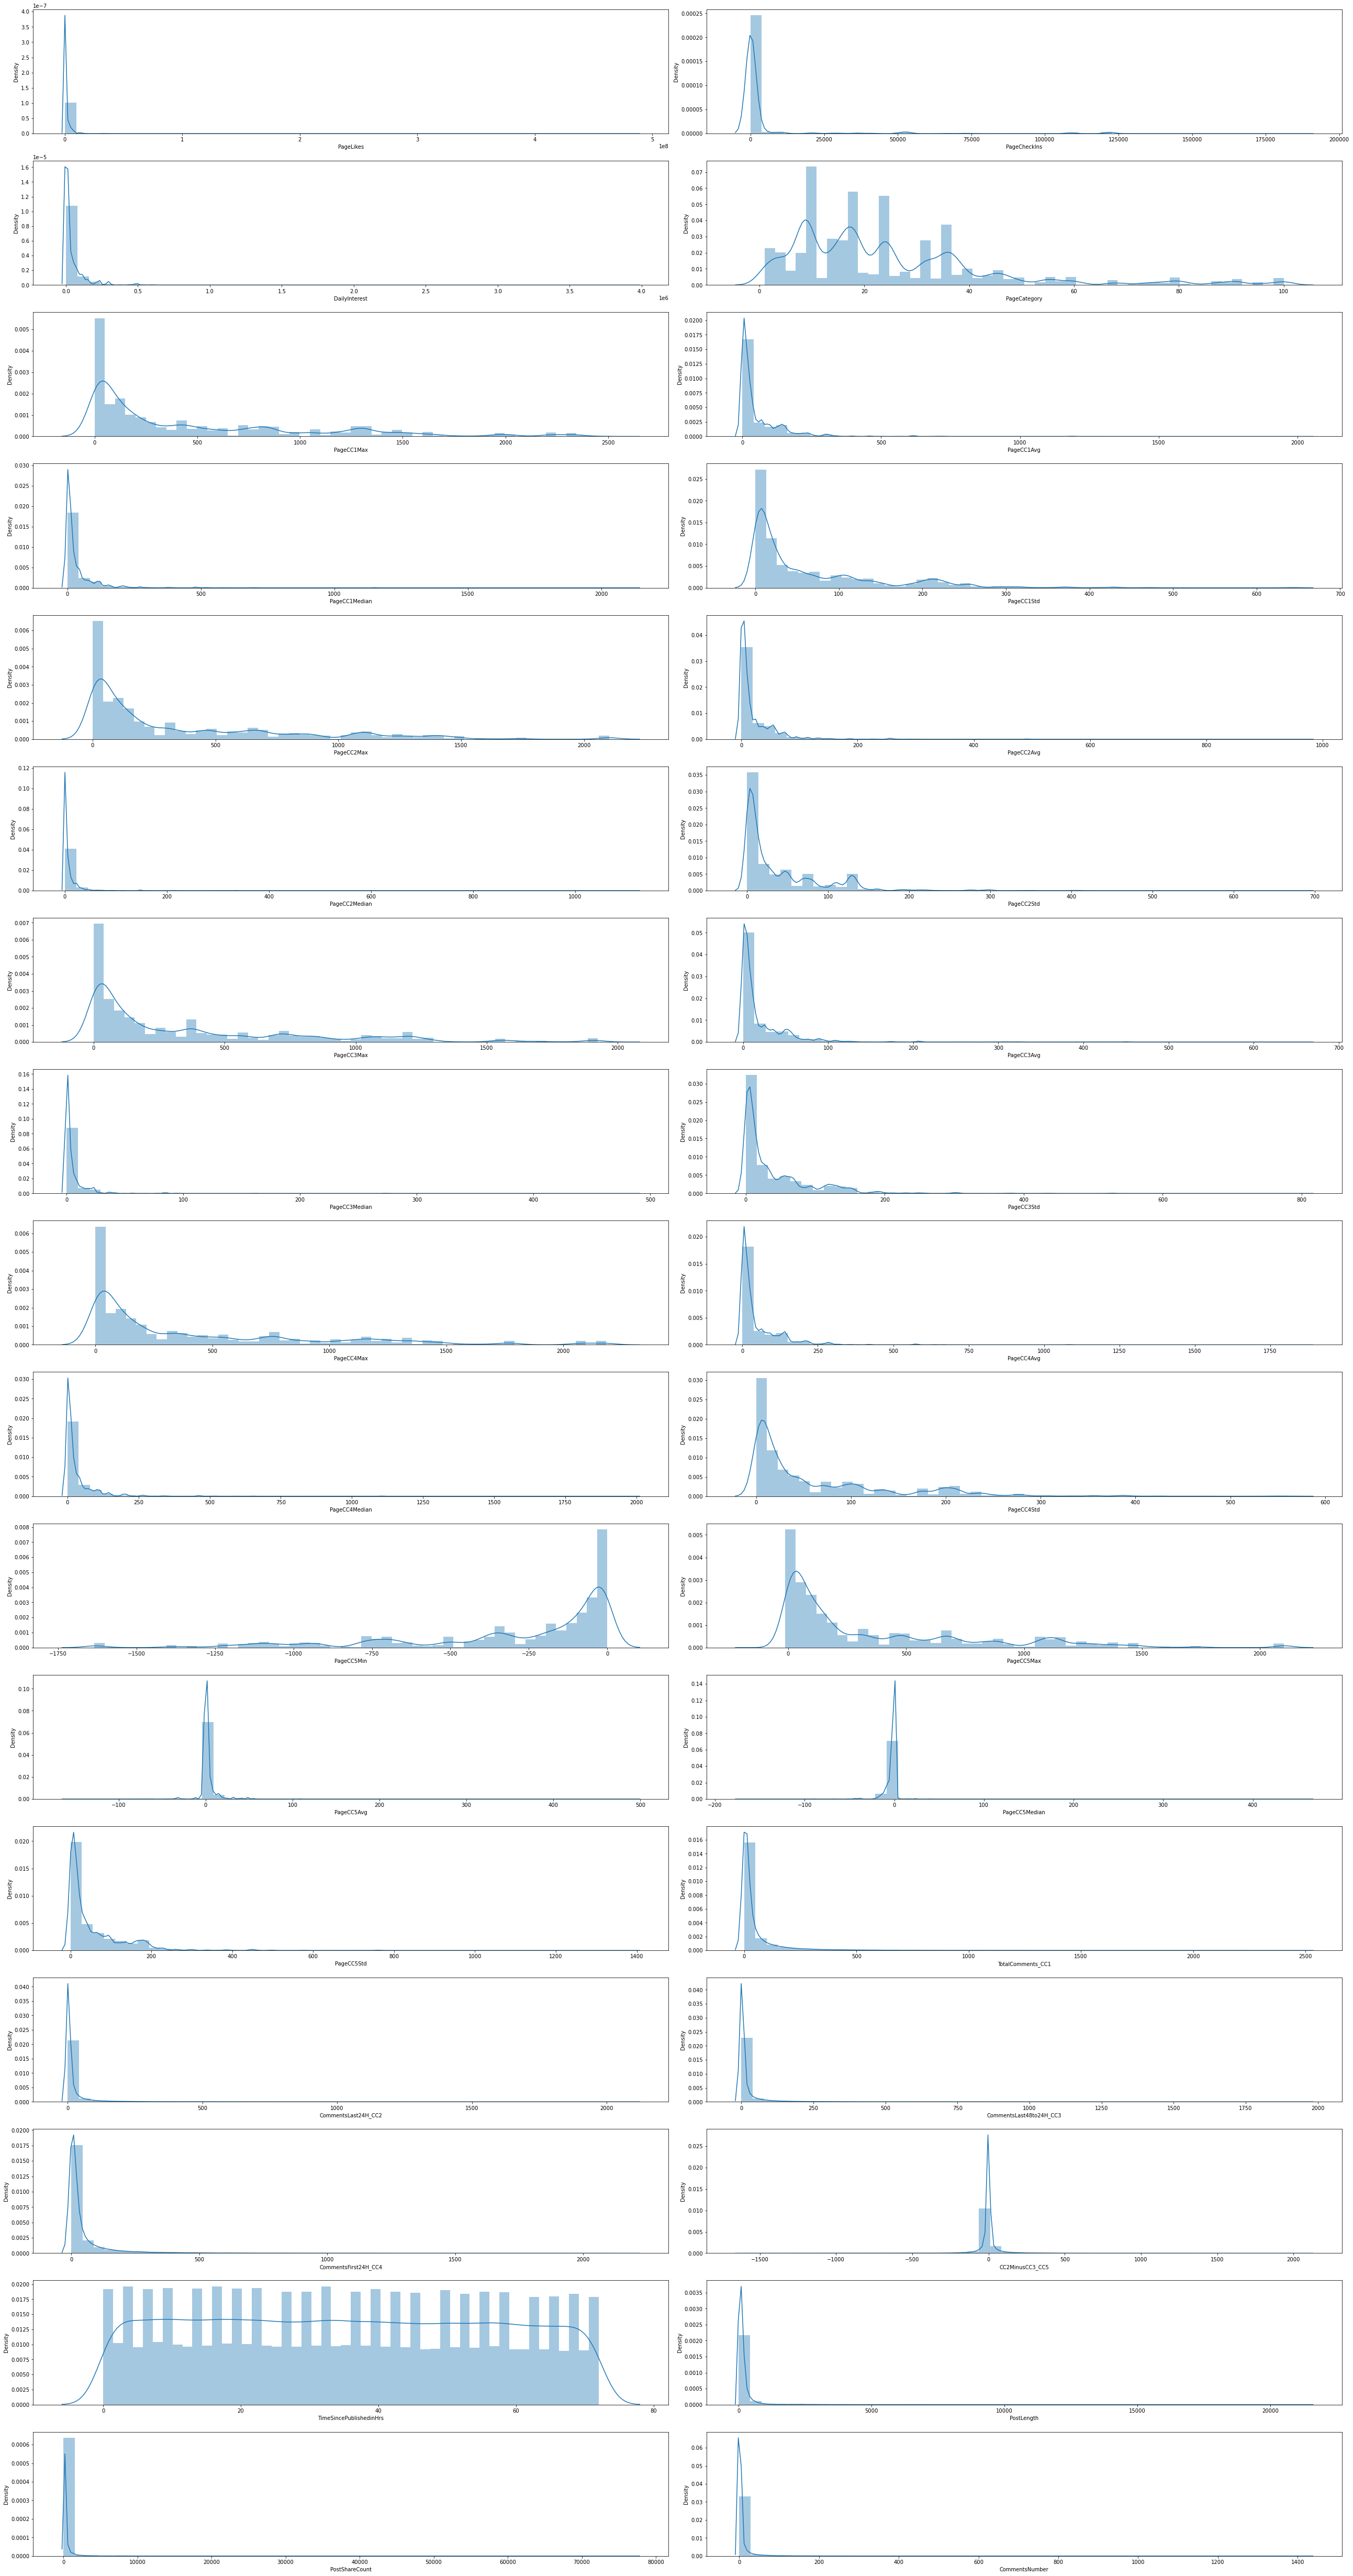

In [19]:
fig = plt.figure(figsize=(36,72))
for index,col in enumerate(unique_group_1[0:]):
    plt.subplot(18,2,index+1)
    sns.distplot(train[unique_group_1].loc[:,col])
fig.tight_layout(pad=1.0)
plt.savefig('distplot.png')

Correlation

In [20]:
# Since the correlation map is huge, I choose to find out the multicollinearity

In [21]:
def corrFilter(x: pd.DataFrame, bound: float):
    xCorr = x.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

corrFilter(train, .95)

PageCC5Min         PageCC3Max             -0.987116
PageCC4Max         PageCC5Min             -0.950350
PageCC4Median      PageCC2Avg              0.951492
PageCC2Avg         PageCC1Median           0.952572
PageCC3Avg         PageCC5Std              0.953210
PageCC2Avg         PageCC5Std              0.953793
PageCC3Avg         PageCC4Median           0.954541
                   PageCC1Median           0.956757
PageCC5Max         PageCC1Max              0.958453
PageCC4Avg         PageCC4Median           0.961630
PageCC5Std         PageCC1Avg              0.962617
PageCC4Avg         PageCC1Median           0.962719
PageCC4Median      PageCC1Avg              0.962922
PageCC4Std         PageCC5Std              0.963533
PageCC1Std         PageCC5Std              0.964062
PageCC1Median      PageCC1Avg              0.964334
PageCC1Max         PageCC3Max              0.964482
PageCC4Avg         PageCC5Std              0.965305
PageCC4Max         PageCC3Max              0.967104
            

In [22]:
#For each pairs of large correlations, delete one column.
del_col = ['PageCC5Min','PageCC5Max', 'PageCC2Avg','PageCC3Avg','PageCC4Std','PageCC4Max','PageCC4Median','TotalComments_CC1','PageCC5Std','PageCC3Max','PageCC4Avg','PageCC1Std','PageCC1Median','PageCC2Max','PageCC3Std']


In [23]:
corrFilter(train.drop(del_col, axis = 1), .95)

PageLikes  PageLikes   NaN
dtype: float64

In [24]:
train.drop(del_col, axis = 1, inplace = True)
test.drop(del_col, axis = 1, inplace = True)

In [25]:
train

,PageLikes,PageCheckIns,DailyInterest,PageCategory,PageCC1Max,PageCC1Avg,PageCC2Median,PageCC2Std,PageCC3Median,PageCC5Avg,...,Published_Friday,Published_Saturday,PredictOn_Sunday,PredictOn_Monday,PredictOn_Tuesday,PredictOn_Wednesday,PredictOn_Thursday,PredictOn_Friday,PredictOn_Saturday,CommentsNumber
0,634995,0,463,1,1280,13.158779,0.0,41.250786,0.0,-0.862595,...,0,0,0,0,0,0,1,0,0,0
1,634995,0,463,1,1280,13.158779,0.0,41.250786,0.0,-0.862595,...,0,0,1,0,0,0,0,0,0,0
2,634995,0,463,1,1280,13.158779,0.0,41.250786,0.0,-0.862595,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,1280,13.158779,0.0,41.250786,0.0,-0.862595,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,1280,13.158779,0.0,41.250786,0.0,-0.862595,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129994,879585,11,49540,9,1063,102.595311,4.0,109.102721,2.0,1.452599,...,0,0,0,0,0,0,0,1,0,0
129995,879585,11,49540,9,1063,102.595311,4.0,109.102721,2.0,1.452599,...,0,0,0,0,0,1,0,0,0,0
129996,879585,11,49540,9,1063,102.595311,4.0,109.102721,2.0,1.452599,...,0,0,0,0,0,0,1,0,0,0
129997,879585,11,49540,9,1063,102.595311,4.0,109.102721,2.0,1.452599,...,0,0,0,0,0,0,0,0,1,0


In [26]:
unique = pd.DataFrame(train.nunique())

# when unique vlaue > 350, put these columns as group 4
unique_group_4 = unique.index[unique[0] > 350].tolist()

In [27]:
# finding outliers

def remove_outlier(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    df_final= data[~((data[col] < (Q1-1.5*IQR)) | (data[col] > (Q3+1.5*IQR)))]
    return df_final.reset_index(drop = True)


C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\24937\Anaconda3\lib\site-

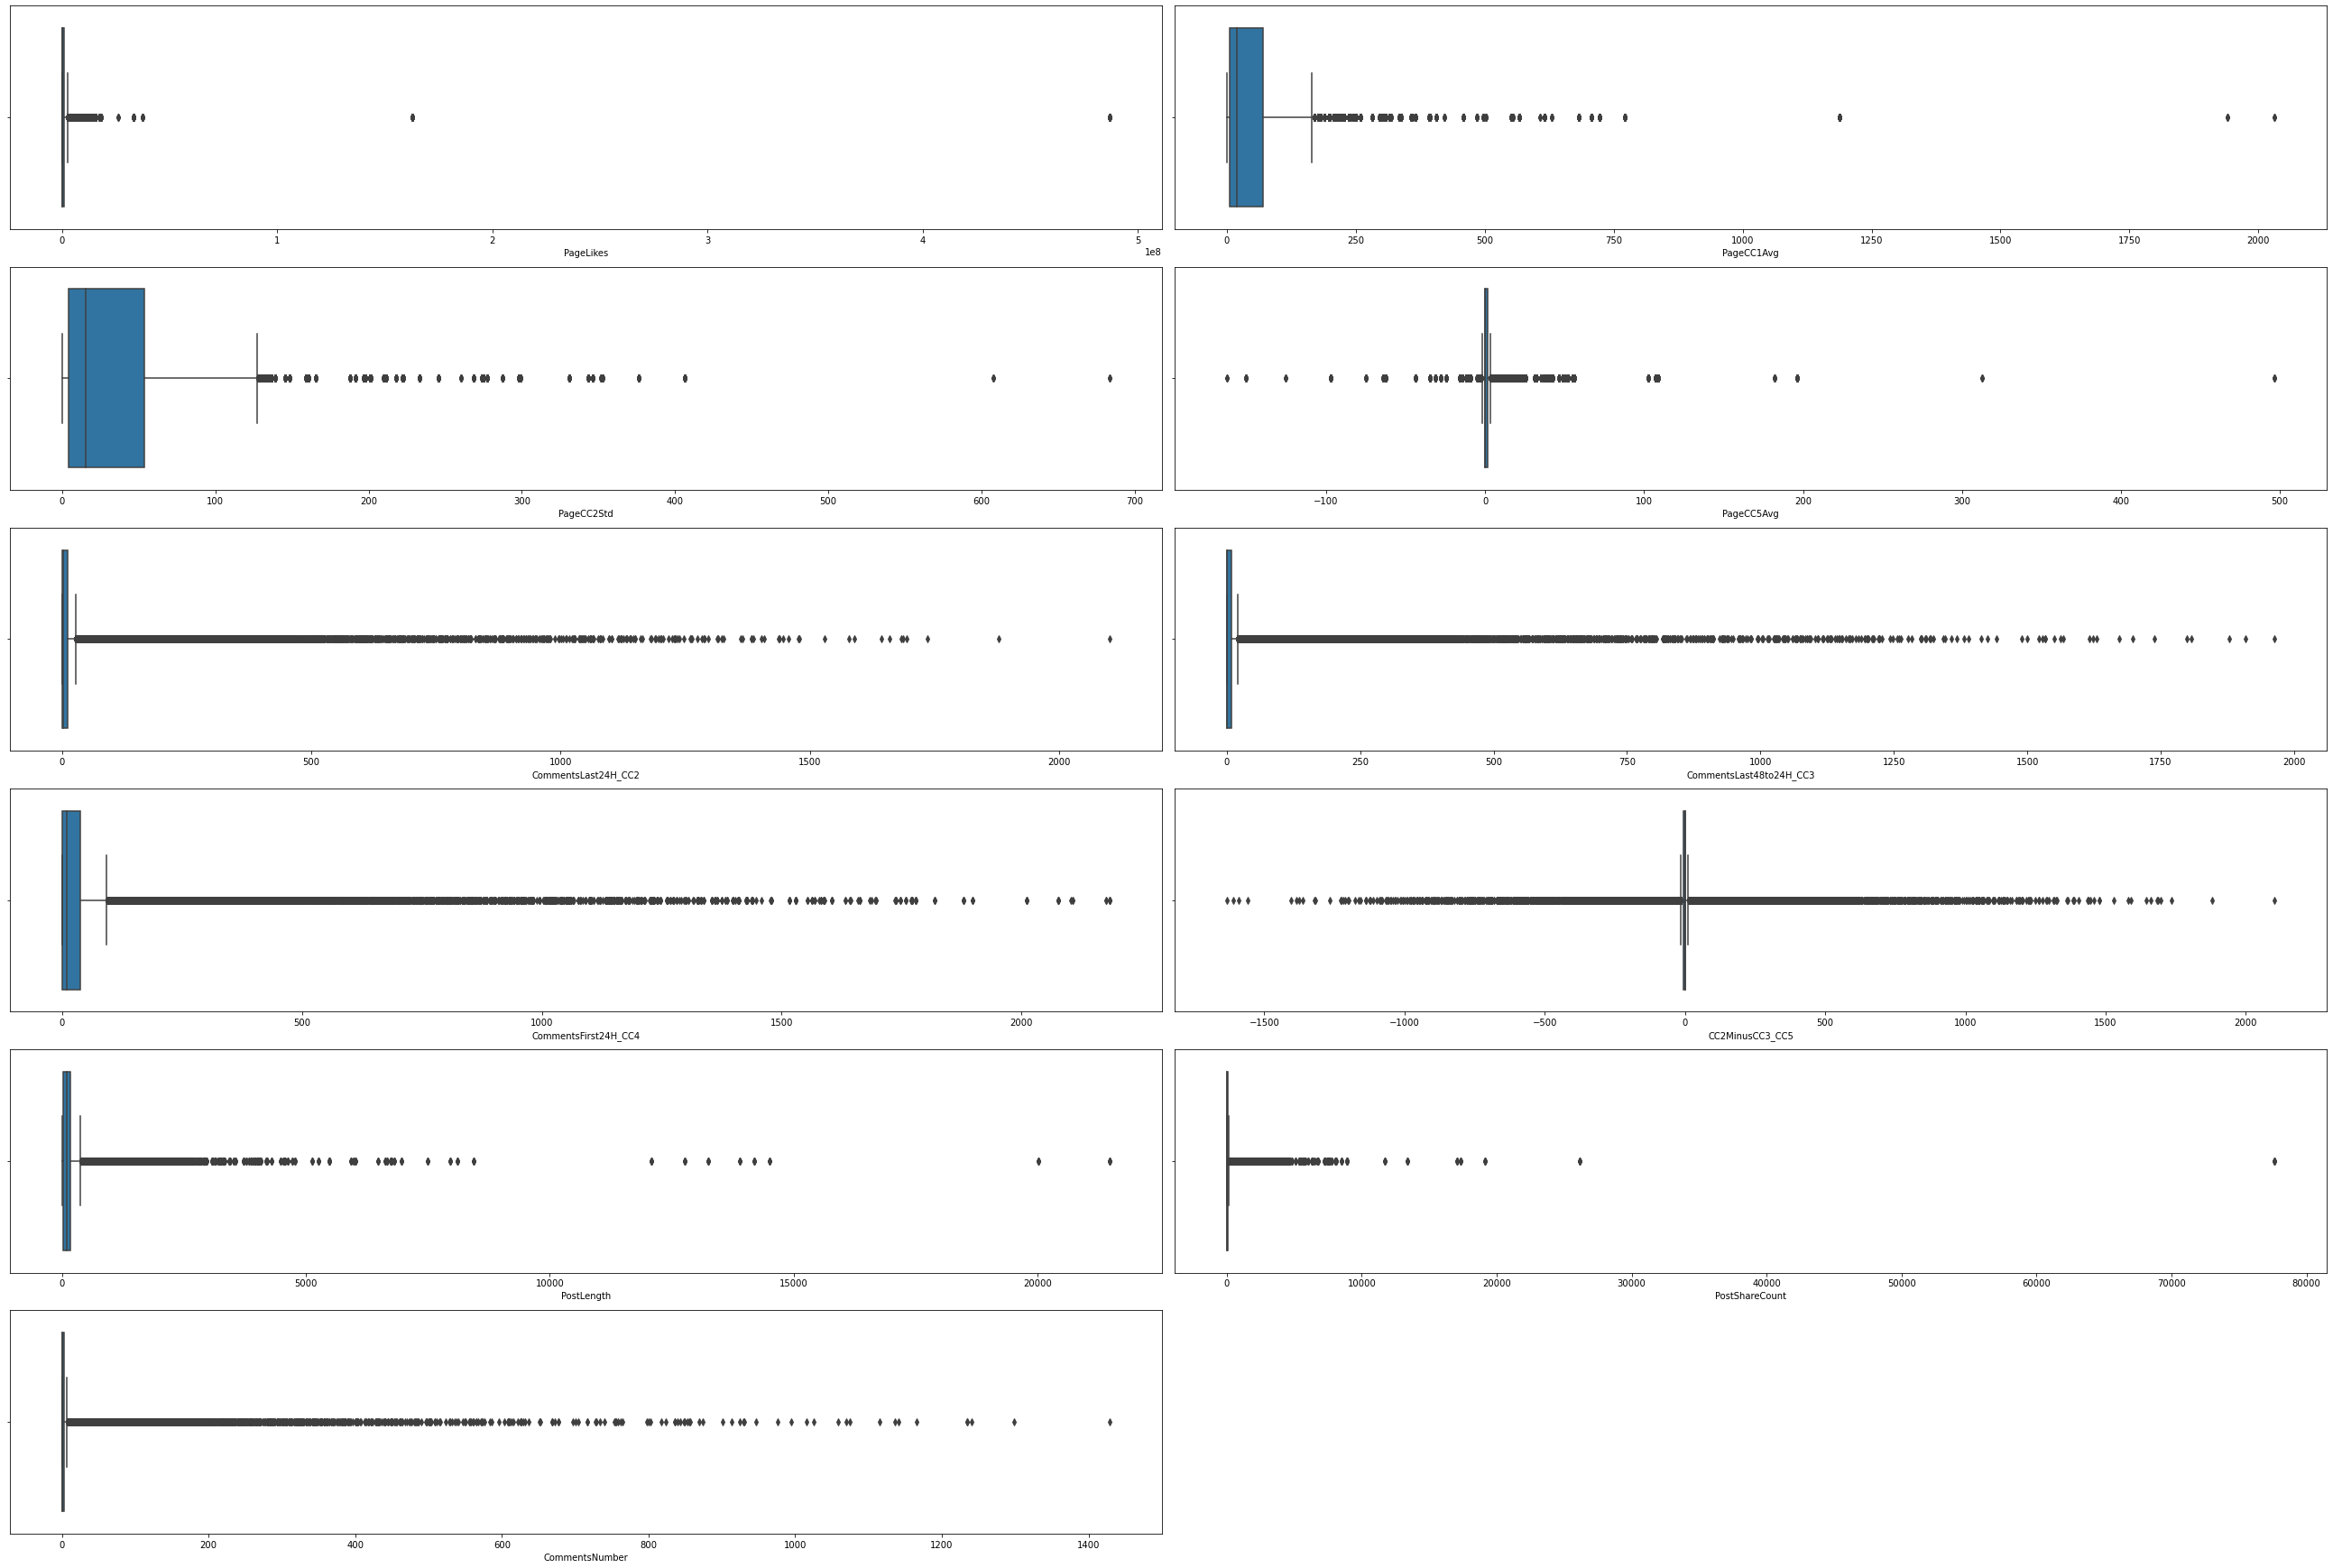

In [28]:
# box plot
fig = plt.figure(figsize=(36,72))
for index,col in enumerate(unique_group_4[0:]):
    plt.subplot(18,2,index+1)
    sns.boxplot(train[unique_group_4].loc[:,col])
fig.tight_layout(pad=1.0)
plt.savefig('boxplot.png')

In [29]:
# looks like some columns has many outliers.
def count_outlier(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3-Q1
    df_final= data[~((data[col] < (Q1-1.5*IQR)) | (data[col] > (Q3+1.5*IQR)))]
    print(col,':', len(data) - len(df_final))
train_numeric = train.select_dtypes(exclude=[np.object])
unique = pd.DataFrame(train_numeric.nunique())
# when unique value > 30, put these columns as group 5
unique_group_5 = unique.index[unique[0] >= 30].tolist()
for col in unique_group_5:
    count_outlier(train,col)

C:\Users\24937\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


PageLikes : 19125
PageCheckIns : 24886
DailyInterest : 14888
PageCC1Max : 4407
PageCC1Avg : 9418
PageCC2Median : 13907
PageCC2Std : 10990
PageCC3Median : 16847
PageCC5Avg : 25583
PageCC5Median : 16738
CommentsLast24H_CC2 : 18717
CommentsLast48to24H_CC3 : 20480
CommentsFirst24H_CC4 : 17433
CC2MinusCC3_CC5 : 39060
TimeSincePublishedinHrs : 0
PostLength : 10118
PostShareCount : 17539
CommentsNumber : 18177


In [30]:
train_cleaned = train.copy()
for col in unique_group_4:
    train_cleaned = remove_outlier(train_cleaned, col)
train_cleaned

,PageLikes,PageCheckIns,DailyInterest,PageCategory,PageCC1Max,PageCC1Avg,PageCC2Median,PageCC2Std,PageCC3Median,PageCC5Avg,...,Published_Friday,Published_Saturday,PredictOn_Sunday,PredictOn_Monday,PredictOn_Tuesday,PredictOn_Wednesday,PredictOn_Thursday,PredictOn_Friday,PredictOn_Saturday,CommentsNumber
0,634995,0,463,1,1280,13.158779,0.0,41.250786,0.0,-0.862595,...,0,0,0,0,0,0,1,0,0,0
1,634995,0,463,1,1280,13.158779,0.0,41.250786,0.0,-0.862595,...,0,0,1,0,0,0,0,0,0,0
2,634995,0,463,1,1280,13.158779,0.0,41.250786,0.0,-0.862595,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,1280,13.158779,0.0,41.250786,0.0,-0.862595,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,1280,13.158779,0.0,41.250786,0.0,-0.862595,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18886,88853,0,3169,2,30,6.471061,1.0,3.545717,1.0,0.186495,...,0,0,0,0,0,0,0,0,1,0
18887,88853,0,3169,2,30,6.471061,1.0,3.545717,1.0,0.186495,...,0,0,0,0,0,0,0,0,1,0
18888,88853,0,3169,2,30,6.471061,1.0,3.545717,1.0,0.186495,...,0,0,0,0,0,0,0,0,1,0
18889,88853,0,3169,2,30,6.471061,1.0,3.545717,1.0,0.186495,...,0,0,0,0,0,0,1,0,0,0


We saw this is not a good method, since most of the rows are deleted. So, I decide not directly delete the outliers by IQR. Try binning in the data preprocessing step.

# Data preprocessing

### including binning, normalization, encoder

For binning, consider simple stats methods such as binning by width, frequency. I choose use WOE and IV indexs(version for continuous target) to detect the prediction power and binning. And Also use IV score for feature selection.

since there is no package for WOE, I define the function: 

1. equally split continuous columns to 20 groups (or other values)
2. min,max for the binning group,sum of target value for each groups created in part 1. 
3. calculate y_sum_percent = (sum of target value for each groups) / sum of target value
4. calculate y_obs_percent = number of observation in each group / total observation.
5. WOE = ln(y_percent/y_obs_percent)
6. IV = sum((y_obs_percent - y_percent) * WOE)
7. merge bins with similar WOE.

In [31]:
warnings.filterwarnings("ignore")
X = train[unique_group_5]
X_test = test[unique_group_5]
target = 'CommentsNumber'

num_bins = 20
cols = X.columns
IV_list = []

scaler = RobustScaler()
scaler.fit(X[[target]])
X[target] = scaler.transform(X[[target]]) # outlier detection

for col in cols[~cols.isin([target])]:

    # step 1
    X[col], bins = pd.qcut(X[col], num_bins, labels = False,duplicates = 'drop',retbins=True)
    # do the same step for testing data
    bins_test = bins
    bins_test[0] = min(X_test[col]) - 0.01; bins_test[-1] = max(X_test[col]) + 0.01
    X_test[col] = pd.cut(X_test[col], bins, labels = False, duplicates = 'drop')

    # step 2
    min_groups = bins[:-1]
    max_groups = bins[1:]
    sum_target_group = []
    for i in range(len(bins)-1):
        sum_target_group += [sum(X[X[col] == i][target])]
    # step 3
    sum_target = sum(X[target])
    percent_target_group = [x/sum_target for x in sum_target_group]
    #print(percent_target_group)
    # step 4
    y_obs_percent = [len(X[X[col] == i])/len(X) for i in range(len(bins)-1)]
    #print(y_obs_percent)
    # step 5
    WOE = np.log(np.array(percent_target_group)/np.array(y_obs_percent))
    #print(WOE) #to see if its monotonic
    # step 6
    IV_calculation =  (np.array(percent_target_group)-np.array(y_obs_percent))*WOE
    IV = sum(IV_calculation)
    # step 7
    label = [i for i in range(len(bins)-1)]
    for i in range(len(bins)-1-1):
        if abs(WOE[i] - WOE[i+1]) < 0.1:
            label[i+1] = label[i]
            X[X[col] == i+1][col] = label[i]
            X_test[X_test[col] == i+1][col] = label[i]
    IV_list += [IV]
    
data = {'column':cols[~cols.isin([target])],'IV_Value':IV_list}
print(pd.DataFrame(data).sort_values(by = 'IV_Value',ascending = False))

                     column  IV_Value
13          CC2MinusCC3_CC5  2.304092
10      CommentsLast24H_CC2  2.161775
4                PageCC1Avg  2.002012
6                PageCC2Std  1.913660
5             PageCC2Median  1.696333
3                PageCC1Max  1.657046
12     CommentsFirst24H_CC4  1.522783
16           PostShareCount  1.520354
2             DailyInterest  1.411521
14  TimeSincePublishedinHrs  1.405586
7             PageCC3Median  1.352186
8                PageCC5Avg  1.268769
9             PageCC5Median  1.253269
0                 PageLikes  1.144332
11  CommentsLast48to24H_CC3  0.839868
1              PageCheckIns  0.083014
15               PostLength  0.050571


In [32]:
X[cols[~cols.isin([target])]]

,PageLikes,PageCheckIns,DailyInterest,PageCC1Max,PageCC1Avg,PageCC2Median,PageCC2Std,PageCC3Median,PageCC5Avg,PageCC5Median,CommentsLast24H_CC2,CommentsLast48to24H_CC3,CommentsFirst24H_CC4,CC2MinusCC3_CC5,TimeSincePublishedinHrs,PostLength,PostShareCount
0,13,0,4,17,8,0,13,0,1,6,0,0,0,8,7,12,0
1,13,0,4,17,8,0,13,0,1,6,0,0,0,8,19,10,0
2,13,0,4,17,8,0,13,0,1,6,0,0,0,8,7,10,0
3,13,0,4,17,8,0,13,0,1,6,0,0,4,8,18,10,0
4,13,0,4,17,8,0,13,0,1,6,0,0,0,8,17,11,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129994,14,1,15,16,16,3,17,1,15,5,2,0,0,11,12,0,0
129995,14,1,15,16,16,3,17,1,15,5,0,0,0,8,2,0,0
129996,14,1,15,16,16,3,17,1,15,5,1,0,1,10,7,0,0
129997,14,1,15,16,16,3,17,1,15,5,0,3,10,5,17,13,13


In [33]:
X.nunique()

PageLikes                   20
PageCheckIns                 8
DailyInterest               20
PageCC1Max                  20
PageCC1Avg                  20
PageCC2Median               11
PageCC2Std                  20
PageCC3Median               10
PageCC5Avg                  20
PageCC5Median                8
CommentsLast24H_CC2         11
CommentsLast48to24H_CC3     10
CommentsFirst24H_CC4        16
CC2MinusCC3_CC5             16
TimeSincePublishedinHrs     20
PostLength                  18
PostShareCount              15
CommentsNumber             526
dtype: int64

In [34]:
X = X[cols[~cols.isin([target])]]
binning_columns = X.columns[X.nunique()<num_bins/2]
scaling_columns = X.columns[X.nunique()>=num_bins/2]
binning_columns

Index(['PageCheckIns', 'PageCC5Median'], dtype='object')

In [35]:
scaling_columns

Index(['PageLikes', 'DailyInterest', 'PageCC1Max', 'PageCC1Avg',
       'PageCC2Median', 'PageCC2Std', 'PageCC3Median', 'PageCC5Avg',
       'CommentsLast24H_CC2', 'CommentsLast48to24H_CC3',
       'CommentsFirst24H_CC4', 'CC2MinusCC3_CC5', 'TimeSincePublishedinHrs',
       'PostLength', 'PostShareCount'],
      dtype='object')

In [36]:
X_test.nunique()# check the code for X_test groups the same

PageLikes                  20
PageCheckIns                8
DailyInterest              20
PageCC1Max                 20
PageCC1Avg                 20
PageCC2Median              11
PageCC2Std                 20
PageCC3Median              10
PageCC5Avg                 20
PageCC5Median               8
CommentsLast24H_CC2        11
CommentsLast48to24H_CC3    10
CommentsFirst24H_CC4       16
CC2MinusCC3_CC5            16
TimeSincePublishedinHrs    20
PostLength                 18
PostShareCount             15
CommentsNumber              0
dtype: int64

Found that PageCheckIns and PostLength has low prediction power. The other columns are good.

In [37]:
# we can choose to delete or not
train[binning_columns] = X[binning_columns]
test[binning_columns] = X_test[binning_columns]
#train.drop(['PageCheckIns','PostLength'], axis = 1, inplace = True)
#test.drop(['PageCheckIns','PostLength'], axis = 1, inplace = True)

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129999 entries, 0 to 129998
Data columns (total 34 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   PageLikes                129999 non-null  int64  
 1   PageCheckIns             129999 non-null  int64  
 2   DailyInterest            129999 non-null  int64  
 3   PageCategory             129999 non-null  object 
 4   PageCC1Max               129999 non-null  int64  
 5   PageCC1Avg               129999 non-null  float64
 6   PageCC2Median            129999 non-null  float64
 7   PageCC2Std               129999 non-null  float64
 8   PageCC3Median            129999 non-null  float64
 9   PageCC5Avg               129999 non-null  float64
 10  PageCC5Median            129999 non-null  int64  
 11  CommentsLast24H_CC2      129999 non-null  int64  
 12  CommentsLast48to24H_CC3  129999 non-null  int64  
 13  CommentsFirst24H_CC4     129999 non-null  int64  
 14  CC2M

In [39]:
train.nunique().sort_values(ascending = False)

CC2MinusCC3_CC5            1625
PostLength                 1286
PostShareCount             1261
CommentsFirst24H_CC4       1050
CommentsLast48to24H_CC3     891
CommentsLast24H_CC2         890
CommentsNumber              526
PageLikes                   426
PageCC1Avg                  411
PageCC2Std                  411
PageCC5Avg                  400
DailyInterest               349
PageCC1Max                  263
PageCC2Median                84
TimeSincePublishedinHrs      73
PageCategory                 72
PageCC3Median                69
PredictAfterHrs              24
PageCheckIns                  8
PageCC5Median                 8
PredictOn_Friday              2
PredictOn_Sunday              2
PredictOn_Thursday            2
Published_Saturday            2
PredictOn_Tuesday             2
PredictOn_Saturday            2
PredictOn_Monday              2
Published_Sunday              2
Published_Monday              2
Published_Tuesday             2
Published_Wednesday           2
Publishe

We only have one categorical column. The grouped columns are all categorical ordinal.
For PageCategory, place, institution, brand, etc do not have orders. So it's categorical nominal.

In [40]:
train['PageCategory']

0         1
1         1
2         1
3         1
4         1
         ..
129994    9
129995    9
129996    9
129997    9
129998    9
Name: PageCategory, Length: 129999, dtype: object

In [41]:
# HashingEncoder for PageCategory. Similar as onehog encoding, hashing encoder has less dimension and some information loss.
encoder=ce.HashingEncoder(cols='PageCategory',n_components=6)
encoder.fit(train)
train = encoder.transform(train)
test = encoder.transform(test)

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69031 entries, 0 to 69030
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   col_0                    69031 non-null  int64  
 1   col_1                    69031 non-null  int64  
 2   col_2                    69031 non-null  int64  
 3   col_3                    69031 non-null  int64  
 4   col_4                    69031 non-null  int64  
 5   col_5                    69031 non-null  int64  
 6   PageLikes                69031 non-null  int64  
 7   PageCheckIns             69031 non-null  int64  
 8   DailyInterest            69031 non-null  int64  
 9   PageCC1Max               69031 non-null  int64  
 10  PageCC1Avg               69031 non-null  float64
 11  PageCC2Median            69031 non-null  float64
 12  PageCC2Std               69031 non-null  float64
 13  PageCC3Median            69031 non-null  float64
 14  PageCC5Avg            

In [43]:
# use RobustScaler
col_transform = scaling_columns
scaler = RobustScaler()
scaler.fit(train[col_transform])
train[col_transform] = scaler.transform(train[col_transform])
test[col_transform] = scaler.transform(test[col_transform])

In [44]:
# use Minmax
col_transform = binning_columns
scaler = MinMaxScaler()
scaler.fit(train[col_transform])
train[col_transform] = scaler.transform(train[col_transform])
test[col_transform] = scaler.transform(test[col_transform])

norm = Normalizer()
norm.fit(train[col_transform])
train[col_transform] = norm.transform(train[col_transform])
test[col_transform] = norm.transform(test[col_transform])

In [45]:
train.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,PageLikes,PageCheckIns,DailyInterest,PageCC1Max,...,Published_Friday,Published_Saturday,PredictOn_Sunday,PredictOn_Monday,PredictOn_Tuesday,PredictOn_Wednesday,PredictOn_Thursday,PredictOn_Friday,PredictOn_Saturday,CommentsNumber
count,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,...,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000,129999.000000
mean,0.143647,0.262940,0.284541,0.116947,0.027769,0.164155,1.104486,0.193494,0.839133,0.353857,...,0.149155,0.134047,0.140401,0.133493,0.136793,0.146440,0.154886,0.144263,0.143724,7.144832
std,0.350733,0.440232,0.451197,0.321358,0.164312,0.370418,8.369087,0.321425,2.344179,0.755948,...,0.356243,0.340704,0.347404,0.340108,0.343630,0.353548,0.361797,0.351357,0.350811,34.147955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.255994,0.000000,-0.107835,-0.282993,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.222096,0.000000,-0.092919,-0.221769,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.777904,0.285714,0.907081,0.778231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,504.812859,1.000000,97.358850,3.111565,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1429.000000


# Data modelling

try these models: KNN, XGB, RandF, Lasso, Rigid, consider ensemble methods, neural network, logistc

In [46]:
# cross validation time complexity is too high
train_x, train_verification_x, train_y, train_verification_y = train_test_split(
    train.drop(columns = "CommentsNumber"),
    train["CommentsNumber"],
    test_size = 0.2,
    random_state = 0
)

In [119]:
# Purpose: efficiently testing different models without repeating too much code

class ModelMaker:
    def __init__(self, model_type, train_x, train_y, test_x, test_y):
        self.model = model_type
        self.train_x = train_x
        self.train_y = train_y
        self.test_x = test_x
        self.test_y = test_y

        # Model outputs when used on testing set
        self.preds_df = pd.DataFrame()

        # Model outputs when used on training set
        self.train_df = pd.DataFrame()


    def run_model(self):
        m = self.model.fit(self.train_x, self.train_y)

        # Testing set predictions
        preds = m.predict(self.test_x)
        preds_rounded = [round(p, 0) for p in preds]

        # Training set predictions
        train_preds = m.predict(self.train_x)
        train_preds_rounded = [round(p, 0) for p in train_preds]

        # Create dataframes with predictions
        self.preds_df = pd.DataFrame(
            {
                "Actual": self.test_y,
                "Predicted": preds_rounded
            }
        )

        self.train_df = pd.DataFrame(
            {
                "Actual": self.train_y,
                "Predicted": train_preds_rounded
            }
        )
    def run_model_XGB(self):
        m = self.model.fit(self.train_x, self.train_y,early_stopping_rounds=10, eval_set=[(self.test_x, self.test_y)], verbose=True)

        # Testing set predictions
        preds = m.predict(self.test_x)
        preds_rounded = [round(p, 0) for p in preds]

        # Training set predictions
        train_preds = m.predict(self.train_x)
        train_preds_rounded = [round(p, 0) for p in train_preds]

        # Create dataframes with predictions
        self.preds_df = pd.DataFrame(
            {
                "Actual": self.test_y,
                "Predicted": preds_rounded
            }
        )

        self.train_df = pd.DataFrame(
            {
                "Actual": self.train_y,
                "Predicted": train_preds_rounded
            }
        )
    def rmse(self, df):
        rmse = 0

        for index, row in df.iterrows():
            rmse += (int(row["Predicted"]) - int(row["Actual"]))**2

        rmse /= len(df)
        rmse = math.sqrt(rmse)

        return rmse
    
    def get_rmse(self):
        return (self.rmse(self.preds_df), self.rmse(self.train_df))
    

Simple selection for models

In [327]:
mod1 = ModelMaker(
    RandomForestRegressor(max_depth=6, random_state=0),
    train_x,
    train_y,
    train_verification_x,
    train_verification_y
)
mod1.run_model()
results = mod1.get_rmse()
print("Testing RMSE: " + str(results[0]))
print("Training RMSE: " + str(results[1]))

Testing RMSE: 16.804430505535873
Training RMSE: 16.14062258107728


In [329]:
mod2 = ModelMaker(
    XGBRegressor(nthread = -1),
    train_x,
    train_y,
    train_verification_x,
    train_verification_y
)
mod2.run_model()
results = mod2.get_rmse()
print("Testing RMSE: " + str(results[0]))
print("Training RMSE: " + str(results[1]))

Testing RMSE: 16.028894582548777
Training RMSE: 6.9099473638291995


In [330]:
mod3 = ModelMaker(
    GradientBoostingRegressor(n_estimators=400, random_state=0),
    train_x,
    train_y,
    train_verification_x,
    train_verification_y
)

mod3.run_model()
results = mod3.get_rmse()

print("Testing RMSE: " + str(results[0]))
print("Training RMSE: " + str(results[1]))

Testing RMSE: 15.108965753943787
Training RMSE: 13.757588560235442


In [54]:
mod4 = ModelMaker(
    LinearRegression(),
    train_x,
    train_y,
    train_verification_x,
    train_verification_y
)

mod4.run_model()
results = mod4.get_rmse()

print("Testing RMSE: " + str(results[0]))
print("Training RMSE: " + str(results[1]))

Testing RMSE: 25.32988201861436
Training RMSE: 27.3869891286084


## runs very slow
mod5 = ModelMaker(
    SVR(),
    train_x,
    train_y,
    train_verification_x,
    train_verification_y
)

mod5.run_model()
results = mod5.get_rmse()

print("Testing RMSE: " + str(results[0]))
print("Training RMSE: " + str(results[1]))

In [111]:
mod6 = ModelMaker(
    Lasso(),
    train_x,
    train_y,
    train_verification_x,
    train_verification_y
)

mod6.run_model()
results = mod6.get_rmse()

print("Testing RMSE: " + str(results[0]))
print("Training RMSE: " + str(results[1]))

Testing RMSE: 25.5351251296056
Training RMSE: 27.526384668213


In [112]:
mod7 = ModelMaker(
    Ridge(),
    train_x,
    train_y,
    train_verification_x,
    train_verification_y
)

mod7.run_model()
results = mod7.get_rmse()

print("Testing RMSE: " + str(results[0]))
print("Training RMSE: " + str(results[1]))

Testing RMSE: 25.32781232011713
Training RMSE: 27.387009843296315


In [113]:
mod8 = ModelMaker(
    LogisticRegression(),
    train_x,
    train_y,
    train_verification_x,
    train_verification_y
)

mod8.run_model()
results = mod8.get_rmse()

print("Testing RMSE: " + str(results[0]))
print("Training RMSE: " + str(results[1]))

Testing RMSE: 28.962716749960826
Training RMSE: 30.733010084045567


In [114]:
mod9 = ModelMaker(
    MLPRegressor(random_state=0, max_iter=500),
    train_x,
    train_y,
    train_verification_x,
    train_verification_y
)

mod9.run_model()
results = mod9.get_rmse()

print("Testing RMSE: " + str(results[0]))
print("Training RMSE: " + str(results[1]))

Testing RMSE: 17.753501279812603
Training RMSE: 18.15534664219302


Other approach:

column PredictAfterHrs is directly relate to CommentsNumber: Numeric (Target) Number of comments the post received after the PredictAfterHrs hours. We found more than 98% of data in column PredictAfterHrs equals 24, the others are in 1-23 evenly. So build the model for PredictAfterHrs == 24 by itself, then build the model for PredictAfterHrs == 1-23.



In [143]:
def prediction_other_approach(regressor1, regressor2 = LinearRegression(), train_x = train_x, train_y = train_y, train_verification_x = train_verification_x, train_verification_y = train_verification_y):
    cols = train_x.columns
    train_x24 = train_x[train.PredictAfterHrs== 24][cols[~cols.isin(['PredictAfterHrs'])]]
    train_y24 = train_y[train_x[train_x.PredictAfterHrs == 24].index]
    train_ver_x24 = train_verification_x[train_verification_x.PredictAfterHrs== 24][cols[~cols.isin(['PredictAfterHrs'])]]
    train_ver_y24 = train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs == 24].index]

    mod_1 = ModelMaker(
        regressor1,
        train_x24, train_y24, train_ver_x24, train_ver_y24
    )    
    mod_2 = ModelMaker(
        regressor2,
        train_x[train.PredictAfterHrs!= 24],
        train_y[train_x[train_x.PredictAfterHrs != 24].index],
        train_verification_x[train_verification_x.PredictAfterHrs!= 24],
        train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs != 24].index]
    )
    mod_1.run_model()
    mod_2.run_model()
    mod_1.preds_df = pd.concat([mod_1.preds_df, mod_2.preds_df], axis = 0).sort_index()
    mod_1.train_df = pd.concat([mod_1.train_df, mod_2.train_df], axis = 0).sort_index()
    results = mod_1.get_rmse()
    print("Testing RMSE: " + str(results[0]))
    print("Training RMSE: " + str(results[1]))

In [110]:
prediction_other_approach(LinearRegression())

Testing RMSE: 25.33364591575037
Training RMSE: 27.32009252635525


In [101]:
cols = train_x.columns
train_x24 = train_x[train.PredictAfterHrs== 24][cols[~cols.isin(['PredictAfterHrs'])]]
train_y24 = train_y[train_x[train_x.PredictAfterHrs == 24].index]
train_ver_x24 = train_verification_x[train_verification_x.PredictAfterHrs== 24][cols[~cols.isin(['PredictAfterHrs'])]]
train_ver_y24 = train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs == 24].index]

mod_1 = ModelMaker(
    LinearRegression(),
    train_x24, train_y24, train_ver_x24, train_ver_y24
)

In [104]:
mod_2 = ModelMaker(
    LinearRegression(),
    train_x[train.PredictAfterHrs!= 24],
    train_y[train_x[train_x.PredictAfterHrs != 24].index],
    train_verification_x[train_verification_x.PredictAfterHrs!= 24],
    train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs != 24].index]
)

In [105]:
mod_1.run_model()
mod_2.run_model()

In [106]:
#train_verification_x.sort_index()

In [107]:
mod_1.preds_df = pd.concat([mod_1.preds_df, mod_2.preds_df], axis = 0).sort_index()
mod_1.train_df = pd.concat([mod_1.train_df, mod_2.train_df], axis = 0).sort_index()

In [108]:
results = mod_1.get_rmse()
print("Testing RMSE: " + str(results[0]))
print("Training RMSE: " + str(results[1]))

Testing RMSE: 25.33364591575037
Training RMSE: 27.32009252635525


In [49]:
def model_without_24(regressor, train_x = train_x, train_y = train_y, train_verification_x = train_verification_x, train_verification_y = train_verification_y, with_col_weight = 0.5):
    mod_2_1 = ModelMaker(
        regressor,
        pd.DataFrame(train_x[train.PredictAfterHrs!= 24].PredictAfterHrs),
        train_y[train_x[train_x.PredictAfterHrs != 24].index],
        pd.DataFrame(train_verification_x[train_verification_x.PredictAfterHrs!= 24].PredictAfterHrs),
        train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs != 24].index]
    )
    cols = train_x.columns
    mod_2_2 = ModelMaker(
        regressor,
        train_x[train.PredictAfterHrs!= 24][cols[~cols.isin(['PredictAfterHrs'])]],
        train_y[train_x[train_x.PredictAfterHrs != 24].index],
        train_verification_x[train_verification_x.PredictAfterHrs!= 24][cols[~cols.isin(['PredictAfterHrs'])]],
        train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs != 24].index]
    )
    mod_2_1.run_model()
    mod_2_2.run_model()
    mod_2_1.preds_df['Predicted'] = mod_2_1.preds_df['Predicted'] * with_col_weight + mod_2_2.preds_df['Predicted'] * (1-with_col_weight)
    mod_2_1.train_df['Predicted'] = mod_2_1.train_df['Predicted'] * with_col_weight + mod_2_2.train_df['Predicted'] * (1-with_col_weight)
    results = mod_2_1.get_rmse()
    print("Testing RMSE: " + str(results[0]))
    print("Training RMSE: " + str(results[1]))

In [150]:
for i in range(0,10,1):
    print('col PredictAfterHrs weight for value:',i/50)
    model_without_24(LinearRegression(), with_col_weight = i/50)

col PredictAfterHrs weight for value: 0.0
Testing RMSE: 10.786758858279287
Training RMSE: 10.869386693369847
col PredictAfterHrs weight for value: 0.02
Testing RMSE: 10.911194557273125
Training RMSE: 10.801149293614483
col PredictAfterHrs weight for value: 0.04
Testing RMSE: 11.043003063780553
Training RMSE: 10.822420844343549
col PredictAfterHrs weight for value: 0.06
Testing RMSE: 11.192538437131528
Training RMSE: 10.856704320990694
col PredictAfterHrs weight for value: 0.08
Testing RMSE: 11.354239296403788
Training RMSE: 10.901420633970744
col PredictAfterHrs weight for value: 0.1
Testing RMSE: 11.511226404399025
Training RMSE: 10.927424857915991
col PredictAfterHrs weight for value: 0.12
Testing RMSE: 11.664136630429761
Training RMSE: 10.989880391091226
col PredictAfterHrs weight for value: 0.14
Testing RMSE: 11.847028460054164
Training RMSE: 11.052857292782791
col PredictAfterHrs weight for value: 0.16
Testing RMSE: 12.00043401992889
Training RMSE: 11.136743548930939
col PredictAf

So that make this column seperate from the model, will make the model worse.

In [55]:
# this version does not seperate columns. Just test which model is the best for PredictAfterHrs != 24.
def model_without_24_2(regressor, train_x = train_x, train_y = train_y, train_verification_x = train_verification_x, train_verification_y = train_verification_y):
    mod = ModelMaker(
        regressor,
        train_x[train.PredictAfterHrs!= 24],
        train_y[train_x[train_x.PredictAfterHrs != 24].index],
        train_verification_x[train_verification_x.PredictAfterHrs!= 24],
        train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs != 24].index]
    )
    mod.run_model()
    results = mod.get_rmse()
    print("Model Name " + str(regressor))
    print("Testing RMSE: " + str(results[0]))
    print("Training RMSE: " + str(results[1]))
    return results[0]

In [67]:
Regression_list = [RandomForestRegressor(max_depth=2, random_state=0),
                  LogisticRegression(),
                  XGBRegressor(nthread = -1,learning_rate = 0.1),
                  GradientBoostingRegressor(n_estimators=400, random_state=0)
                  ]

for regressor in Regression_list:
    model_without_24_2(regressor)

Model Name RandomForestRegressor(max_depth=2, random_state=0)
Testing RMSE: 13.597257689205815
Training RMSE: 8.999110330896784
Model Name LogisticRegression()
Testing RMSE: 19.437345926506186
Training RMSE: 10.254896071099147
Model Name XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=-1, nthread=-1, num_parallel_tree=1,
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)
Testing RMSE: 10.368019740207545
Training RMSE: 0.9983420823082462
Model Name GradientBoostingRegressor(n_estimators=400, random_state=0)
Testing RMSE: 9.065387471035091


Finally, choose the model: 

PredictAfterHrs = 24: XGboost, Random Forest, Gradient Boost
PredictAfterHrs != 24: XGboost, Random Forest, Gradient Boost

We may try model stacking with these models. Also pruning its best parameters.

# hyper pruning parameter for PredictAfterHrs ！= 24

In [59]:
def model_without_24_2_noprint(regressor, train_x = train_x, train_y = train_y, train_verification_x = train_verification_x, train_verification_y = train_verification_y):
    mod = ModelMaker(
        regressor,
        train_x[train.PredictAfterHrs!= 24],
        train_y[train_x[train_x.PredictAfterHrs != 24].index],
        train_verification_x[train_verification_x.PredictAfterHrs!= 24],
        train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs != 24].index]
    )
    mod.run_model()
    results = mod.get_rmse()
    return results[0]

In [61]:
# best parameters

param_gradient = {'n_estimators': [200,400,800],
              'learning_rate': [0.01,0.05,0.1,0.2],
             }
best_i = 0;best_j = 0; RMSE = 100000
for i in param_gradient['n_estimators']:
    for j in param_gradient['learning_rate']:
        RMSE_new = model_without_24_2_noprint(GradientBoostingRegressor(n_estimators=i, learning_rate = j, random_state=0))
        if RMSE_new < RMSE:
            best_i = i; best_j = j; RMSE = RMSE_new


In [63]:
print('best parameter is:')
print('n_estimators:', best_i)
print('learning_rate:', best_j)
print('best RMSE:',RMSE)

best parameter is:
n_estimators: 800
learning_rate: 0.05
best RMSE: 8.492889182525971


In [122]:
def model_without_24_2_noprint_xgb(regressor, train_x = train_x, train_y = train_y, train_verification_x = train_verification_x, train_verification_y = train_verification_y):
    mod = ModelMaker(
        regressor,
        train_x[train.PredictAfterHrs!= 24],
        train_y[train_x[train_x.PredictAfterHrs != 24].index],
        train_verification_x[train_verification_x.PredictAfterHrs!= 24],
        train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs != 24].index]
    )
    mod.run_model_XGB()
    results = mod.get_rmse()
    return results[0]


param_xgboost = {'n_estimators': [1000],
              'learning_rate': [0.01,0.05,0.1,0.2],
             }
best_i = 0;best_j = 0; RMSE = 100000
for i in param_xgboost['n_estimators']:
    for j in param_xgboost['learning_rate']:
        RMSE_new = model_without_24_2_noprint_xgb(XGBRegressor(nthread = -1,n_estimators = i, learning_rate = j))
        if RMSE_new < RMSE:
            best_i = i; best_j = j; RMSE = RMSE_new


[0]	validation_0-rmse:22.23225
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:22.14142
[2]	validation_0-rmse:22.05230
[3]	validation_0-rmse:21.96348
[4]	validation_0-rmse:21.87676
[5]	validation_0-rmse:21.78824
[6]	validation_0-rmse:21.69871
[7]	validation_0-rmse:21.61487
[8]	validation_0-rmse:21.52563
[9]	validation_0-rmse:21.43743
[10]	validation_0-rmse:21.35616
[11]	validation_0-rmse:21.26985
[12]	validation_0-rmse:21.18597
[13]	validation_0-rmse:21.10491
[14]	validation_0-rmse:21.02309
[15]	validation_0-rmse:20.94391
[16]	validation_0-rmse:20.86470
[17]	validation_0-rmse:20.78513
[18]	validation_0-rmse:20.70897
[19]	validation_0-rmse:20.63034
[20]	validation_0-rmse:20.55508
[21]	validation_0-rmse:20.47826
[22]	validation_0-rmse:20.38251
[23]	validation_0-rmse:20.28731
[24]	validation_0-rmse:20.19515
[25]	validation_0-rmse:20.11830
[26]	validation_0-rmse:20.02756
[27]	validation_0-rmse:19.95244
[28]	validation_0-rmse:19.86250
[29]	validation_0

[250]	validation_0-rmse:11.13784
[251]	validation_0-rmse:11.13082
[252]	validation_0-rmse:11.11933
[253]	validation_0-rmse:11.10774
[254]	validation_0-rmse:11.10130
[255]	validation_0-rmse:11.09003
[256]	validation_0-rmse:11.08329
[257]	validation_0-rmse:11.07413
[258]	validation_0-rmse:11.06342
[259]	validation_0-rmse:11.05354
[260]	validation_0-rmse:11.04494
[261]	validation_0-rmse:11.03608
[262]	validation_0-rmse:11.02542
[263]	validation_0-rmse:11.01621
[264]	validation_0-rmse:11.00679
[265]	validation_0-rmse:10.99869
[266]	validation_0-rmse:10.98944
[267]	validation_0-rmse:10.98064
[268]	validation_0-rmse:10.97185
[269]	validation_0-rmse:10.96646
[270]	validation_0-rmse:10.95785
[271]	validation_0-rmse:10.95258
[272]	validation_0-rmse:10.94530
[273]	validation_0-rmse:10.93854
[274]	validation_0-rmse:10.93401
[275]	validation_0-rmse:10.92538
[276]	validation_0-rmse:10.92003
[277]	validation_0-rmse:10.91154
[278]	validation_0-rmse:10.90685
[279]	validation_0-rmse:10.90011
[280]	vali

[499]	validation_0-rmse:10.24160
[500]	validation_0-rmse:10.24059
[501]	validation_0-rmse:10.23920
[502]	validation_0-rmse:10.23739
[503]	validation_0-rmse:10.23491
[504]	validation_0-rmse:10.23367
[505]	validation_0-rmse:10.23244
[506]	validation_0-rmse:10.23110
[507]	validation_0-rmse:10.22922
[508]	validation_0-rmse:10.22720
[509]	validation_0-rmse:10.22546
[510]	validation_0-rmse:10.22415
[511]	validation_0-rmse:10.22302
[512]	validation_0-rmse:10.22105
[513]	validation_0-rmse:10.22007
[514]	validation_0-rmse:10.21771
[515]	validation_0-rmse:10.21662
[516]	validation_0-rmse:10.21464
[517]	validation_0-rmse:10.21273
[518]	validation_0-rmse:10.21179
[519]	validation_0-rmse:10.21051
[520]	validation_0-rmse:10.20865
[521]	validation_0-rmse:10.20677
[522]	validation_0-rmse:10.20536
[523]	validation_0-rmse:10.20352
[524]	validation_0-rmse:10.20247
[525]	validation_0-rmse:10.20196
[526]	validation_0-rmse:10.19981
[527]	validation_0-rmse:10.19897
[528]	validation_0-rmse:10.19815
[529]	vali

[748]	validation_0-rmse:10.05247
[749]	validation_0-rmse:10.05251
[750]	validation_0-rmse:10.05200
[751]	validation_0-rmse:10.05172
[752]	validation_0-rmse:10.05122
[753]	validation_0-rmse:10.05100
[754]	validation_0-rmse:10.05104
[755]	validation_0-rmse:10.05055
[756]	validation_0-rmse:10.04907
[757]	validation_0-rmse:10.04882
[758]	validation_0-rmse:10.04729
[759]	validation_0-rmse:10.04730
[760]	validation_0-rmse:10.04711
[761]	validation_0-rmse:10.04706
[762]	validation_0-rmse:10.04607
[763]	validation_0-rmse:10.04462
[764]	validation_0-rmse:10.04466
[765]	validation_0-rmse:10.04468
[766]	validation_0-rmse:10.04368
[767]	validation_0-rmse:10.04320
[768]	validation_0-rmse:10.04170
[769]	validation_0-rmse:10.04142
[770]	validation_0-rmse:10.04049
[771]	validation_0-rmse:10.03905
[772]	validation_0-rmse:10.03909
[773]	validation_0-rmse:10.03903
[774]	validation_0-rmse:10.03884
[775]	validation_0-rmse:10.03845
[776]	validation_0-rmse:10.03699
[777]	validation_0-rmse:10.03703
[778]	vali

[6]	validation_0-rmse:17.16423
[7]	validation_0-rmse:16.68966
[8]	validation_0-rmse:16.28831
[9]	validation_0-rmse:15.94223
[10]	validation_0-rmse:15.52440
[11]	validation_0-rmse:14.79638
[12]	validation_0-rmse:14.13740
[13]	validation_0-rmse:13.49532
[14]	validation_0-rmse:12.96020
[15]	validation_0-rmse:12.69211
[16]	validation_0-rmse:12.45826
[17]	validation_0-rmse:12.26690
[18]	validation_0-rmse:12.09146
[19]	validation_0-rmse:11.92610
[20]	validation_0-rmse:11.78209
[21]	validation_0-rmse:11.61867
[22]	validation_0-rmse:11.53934
[23]	validation_0-rmse:11.46854
[24]	validation_0-rmse:11.41015
[25]	validation_0-rmse:11.35349
[26]	validation_0-rmse:11.28285
[27]	validation_0-rmse:11.23367
[28]	validation_0-rmse:11.12562
[29]	validation_0-rmse:11.09569
[30]	validation_0-rmse:11.05891
[31]	validation_0-rmse:10.99454
[32]	validation_0-rmse:10.95523
[33]	validation_0-rmse:10.91384
[34]	validation_0-rmse:10.88673
[35]	validation_0-rmse:10.85966
[36]	validation_0-rmse:10.82819
[37]	validat

In [123]:
print('best parameter is:')
print('n_estimators:', best_i)
print('learning_rate:', best_j)
print('best RMSE:',RMSE)

best parameter is:
n_estimators: 1000
learning_rate: 0.01
best RMSE: 10.052881013255188


In [71]:
param_randf = {'n_estimators': [200,400,800],
              'max_depth': [2,4,6,8],
             }
best_i = 0;best_j = 0; RMSE = 100000
for i in param_randf['n_estimators']:
    for j in param_randf['max_depth']:
        RMSE_new = model_without_24_2_noprint(RandomForestRegressor(n_estimators = i, max_depth = j, random_state = 0))
        if RMSE_new < RMSE:
            best_i = i; best_j = j; RMSE = RMSE_new


In [72]:
print('best parameter is:')
print('n_estimators:', best_i)
print('max_depth:', best_j)
print('best RMSE:',RMSE)

best parameter is:
n_estimators: 800
learning_rate: 8
best RMSE: 9.958873764972958


In [80]:
# further improvement for gradient boost

param_gradient = {'min_samples_split': [2,4,6],
              'min_samples_leaf': [1,2,3],
              'max_depth': [3,5,7]
             }
best_i = 0;best_j = 0; best_k=0;RMSE = 100000
for i in param_gradient['min_samples_split']:
    for j in param_gradient['min_samples_leaf']:
        for k in param_gradient['max_depth']:
            RMSE_new = model_without_24_2_noprint(GradientBoostingRegressor(n_estimators=800, learning_rate = 0.05,min_samples_split = i, min_samples_leaf = j, max_depth = k, random_state=0))
            if RMSE_new < RMSE:
                best_i = i; best_j = j;best_k=k; RMSE = RMSE_new
print('best parameter is:')
print('min_samples_split:', best_i)
print('min_samples_leaf:', best_j)
print('max_depth:', best_k)
print('best RMSE:',RMSE)

best parameter is:
min_samples_split: 6
min_samples_leaf: 2
max_depth: 3
best RMSE: 7.039028105261881


Use gradient boost for the model with PredictAfterHrs!=24, 
n_estimators: 800
learning_rate: 0.05
min_samples_split: 6
min_samples_leaf: 2
max_depth: 3
best RMSE: 7.039028105261881

In [73]:
def model_with_24_noprint(regressor, train_x = train_x, train_y = train_y, train_verification_x = train_verification_x, train_verification_y = train_verification_y):
    mod = ModelMaker(
        regressor,
        train_x[train.PredictAfterHrs== 24],
        train_y[train_x[train_x.PredictAfterHrs == 24].index],
        train_verification_x[train_verification_x.PredictAfterHrs== 24],
        train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs == 24].index]
    )
    mod.run_model()
    results = mod.get_rmse()
    return results[0]

# hyper pruning parameter for PredictAfterHrs ！= 24

param_gradient = {'n_estimators': [200,400,800],
              'learning_rate': [0.05],
             }
best_i = 0;best_j = 0; RMSE = 100000
for i in param_gradient['n_estimators']:
    for j in param_gradient['learning_rate']:
        RMSE_new = model_with_24_noprint(GradientBoostingRegressor(n_estimators=i, learning_rate = j, random_state=0))
        if RMSE_new < RMSE:
            best_i = i; best_j = j; RMSE = RMSE_new


print('best parameter is:')
print('n_estimators:', best_i)
print('learning_rate:', best_j)
print('best RMSE:',RMSE)

param_xgboost = {'n_estimators': [200,400,800],
              'learning_rate': [0.01,0.05,0.1,0.2],
             }
best_i = 0;best_j = 0; RMSE = 100000
for i in param_xgboost['n_estimators']:
    for j in param_xgboost['learning_rate']:
        RMSE_new = model_with_24_noprint(XGBRegressor(nthread = -1,n_estimators = i, learning_rate = j))
        if RMSE_new < RMSE:
            best_i = i; best_j = j; RMSE = RMSE_new


print('best parameter is:')
print('n_estimators:', best_i)
print('learning_rate:', best_j)
print('best RMSE:',RMSE)

param_randf = {'n_estimators': [200,400,800],
              'max_depth': [2,4,6,8],
             }
best_i = 0;best_j = 0; RMSE = 100000
for i in param_randf['n_estimators']:
    for j in param_randf['max_depth']:
        RMSE_new = model_with_24_noprint(RandomForestRegressor(n_estimators = i, max_depth = j, random_state = 0))
        if RMSE_new < RMSE:
            best_i = i; best_j = j; RMSE = RMSE_new


print('best parameter is:')
print('n_estimators:', best_i)
print('learning_rate:', best_j)
print('best RMSE:',RMSE)

In [134]:
def model_with_24_print_xgb(regressor, train_x = train_x, train_y = train_y, train_verification_x = train_verification_x, train_verification_y = train_verification_y):
    mod = ModelMaker(
        regressor,
        train_x[train.PredictAfterHrs== 24],
        train_y[train_x[train_x.PredictAfterHrs == 24].index],
        train_verification_x[train_verification_x.PredictAfterHrs== 24],
        train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs == 24].index]
    )
    mod.run_model_XGB()
    results = mod.get_rmse()
    print("Testing RMSE: " + str(results[0]))
    print("Training RMSE: " + str(results[1]))
    return results[0]

In [133]:
def model_with_24_print(regressor, train_x = train_x, train_y = train_y, train_verification_x = train_verification_x, train_verification_y = train_verification_y):
    mod = ModelMaker(
        regressor,
        train_x[train.PredictAfterHrs== 24],
        train_y[train_x[train_x.PredictAfterHrs == 24].index],
        train_verification_x[train_verification_x.PredictAfterHrs== 24],
        train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs == 24].index]
    )
    mod.run_model()
    results = mod.get_rmse()
    print("Testing RMSE: " + str(results[0]))
    print("Training RMSE: " + str(results[1]))
    return results[0]

In [132]:
# include early stopping
model_with_24_print_xgb(XGBRegressor(
    n_estimators= 1000,
    learning_rate= 0.1,
    max_depth= 3, random_state=0))


[0]	validation_0-rmse:31.06673
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:29.69564
[2]	validation_0-rmse:28.50457
[3]	validation_0-rmse:27.45334
[4]	validation_0-rmse:26.57667
[5]	validation_0-rmse:25.62160
[6]	validation_0-rmse:24.77124
[7]	validation_0-rmse:24.08047
[8]	validation_0-rmse:23.50609
[9]	validation_0-rmse:22.95858
[10]	validation_0-rmse:22.54077
[11]	validation_0-rmse:22.21313
[12]	validation_0-rmse:21.81279
[13]	validation_0-rmse:21.42510
[14]	validation_0-rmse:21.14280
[15]	validation_0-rmse:20.83493
[16]	validation_0-rmse:20.62371
[17]	validation_0-rmse:20.35540
[18]	validation_0-rmse:20.03855
[19]	validation_0-rmse:19.82169
[20]	validation_0-rmse:19.69816
[21]	validation_0-rmse:19.56076
[22]	validation_0-rmse:19.44357
[23]	validation_0-rmse:19.29133
[24]	validation_0-rmse:19.16005
[25]	validation_0-rmse:19.09960
[26]	validation_0-rmse:18.93603
[27]	validation_0-rmse:18.88136
[28]	validation_0-rmse:18.79594
[29]	validation_0

Testing RMSE: 15.44280833118138
Training RMSE: 15.16203565890661


15.44280833118138

In [91]:
model_with_24_print(XGBRegressor(n_estimators=200))

Testing RMSE: 15.358933101579966
Training RMSE: 4.667001588206693


15.358933101579966

In [137]:
model_with_24_print(GradientBoostingRegressor(n_estimators = 800,n_iter_no_change=10))

Testing RMSE: 15.93907139281344
Training RMSE: 15.628034993142863


15.93907139281344

In [140]:
model_with_24_print(GradientBoostingRegressor(n_estimators = 800,learning_rate=0.05,
                                              min_samples_split = 6, min_samples_leaf = 2, max_depth = 3, n_iter_no_change=10))

Testing RMSE: 16.407747711157008
Training RMSE: 16.447215317184444


16.407747711157008


## Prediction choice
for model with PredictAfterHrs != 24:
gradient boost
n_estimators: 800
learning_rate: 0.05
min_samples_split: 6
min_samples_leaf: 2
max_depth: 3

for model with PredictAfterHrs == 24
XGBRegressor(
    n_estimators= 1000,
    learning_rate= 0.1,
    max_depth= 3, random_state=0) (with early stopping)

In [147]:
# compare the solution
def prediction_other_approach_xgb(regressor1, regressor2 = LinearRegression(), train_x = train_x, train_y = train_y, train_verification_x = train_verification_x, train_verification_y = train_verification_y):
    cols = train_x.columns
    train_x24 = train_x[train.PredictAfterHrs== 24][cols[~cols.isin(['PredictAfterHrs'])]]
    train_y24 = train_y[train_x[train_x.PredictAfterHrs == 24].index]
    train_ver_x24 = train_verification_x[train_verification_x.PredictAfterHrs== 24][cols[~cols.isin(['PredictAfterHrs'])]]
    train_ver_y24 = train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs == 24].index]

    mod_1 = ModelMaker(
        regressor1,
        train_x24, train_y24, train_ver_x24, train_ver_y24
    )    
    mod_2 = ModelMaker(
        regressor2,
        train_x[train.PredictAfterHrs!= 24],
        train_y[train_x[train_x.PredictAfterHrs != 24].index],
        train_verification_x[train_verification_x.PredictAfterHrs!= 24],
        train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs != 24].index]
    )
    mod_1.run_model_XGB()
    mod_2.run_model()
    mod_1.preds_df = pd.concat([mod_1.preds_df, mod_2.preds_df], axis = 0).sort_index()
    mod_1.train_df = pd.concat([mod_1.train_df, mod_2.train_df], axis = 0).sort_index()
    results = mod_1.get_rmse()
    print("Testing RMSE: " + str(results[0]))
    print("Training RMSE: " + str(results[1]))

In [141]:
mod_with_24 = XGBRegressor(
    n_estimators= 1000,
    learning_rate= 0.1,
    max_depth= 3, random_state=0)
mod_without_24 = GradientBoostingRegressor(n_estimators = 800,learning_rate=0.05,
                                              min_samples_split = 6, min_samples_leaf = 2, max_depth = 3, n_iter_no_change=10)

prediction_other_approach_xgb(mod_with_24,mod_without_24)

[0]	validation_0-rmse:31.06673
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:29.69564
[2]	validation_0-rmse:28.50457
[3]	validation_0-rmse:27.45334
[4]	validation_0-rmse:26.57667
[5]	validation_0-rmse:25.62160
[6]	validation_0-rmse:24.77124
[7]	validation_0-rmse:24.08047
[8]	validation_0-rmse:23.50609
[9]	validation_0-rmse:22.95858
[10]	validation_0-rmse:22.54077
[11]	validation_0-rmse:22.21313
[12]	validation_0-rmse:21.81279
[13]	validation_0-rmse:21.42510
[14]	validation_0-rmse:21.14280
[15]	validation_0-rmse:20.83493
[16]	validation_0-rmse:20.62371
[17]	validation_0-rmse:20.35540
[18]	validation_0-rmse:20.03855
[19]	validation_0-rmse:19.82169
[20]	validation_0-rmse:19.69816
[21]	validation_0-rmse:19.56076
[22]	validation_0-rmse:19.44357
[23]	validation_0-rmse:19.29133
[24]	validation_0-rmse:19.16005
[25]	validation_0-rmse:19.09960
[26]	validation_0-rmse:18.93603
[27]	validation_0-rmse:18.88136
[28]	validation_0-rmse:18.79594
[29]	validation_0

Testing RMSE: 15.349319704293586
Training RMSE: 15.048826451554788


In [149]:
mod_with_24 = GradientBoostingRegressor(n_estimators=800, random_state=0, n_iter_no_change=10)
mod_without_24 = GradientBoostingRegressor(n_estimators = 800,learning_rate=0.05,
                                              min_samples_split = 6, min_samples_leaf = 2, max_depth = 3, n_iter_no_change=10)

prediction_other_approach(mod_with_24,mod_without_24)

Testing RMSE: 16.760501874255528
Training RMSE: 16.930909562468482


In [145]:
mod_with_24 = GradientBoostingRegressor(n_estimators = 800,learning_rate=0.05,
                                              min_samples_split = 6, min_samples_leaf = 2, max_depth = 3, n_iter_no_change=10)
mod_without_24 = GradientBoostingRegressor(n_estimators = 800,learning_rate=0.05,
                                              min_samples_split = 6, min_samples_leaf = 2, max_depth = 3, n_iter_no_change=10)

prediction_other_approach(mod_with_24,mod_without_24)

Testing RMSE: 16.016234552190138
Training RMSE: 15.91062542526505


Generate solution for submit

In [174]:
cols = train_x.columns
trainx = train[cols[~cols.isin(['CommentsNumber'])]]
trainy = train['CommentsNumber']
testx = test[cols[~cols.isin(['CommentsNumber'])]]

# model with 24
train_x24 = train_x[train.PredictAfterHrs== 24][cols[~cols.isin(['PredictAfterHrs'])]]
train_y24 = train_y[train_x[train_x.PredictAfterHrs == 24].index]
train_ver_x24 = train_verification_x[train_verification_x.PredictAfterHrs== 24][cols[~cols.isin(['PredictAfterHrs'])]]
train_ver_y24 = train_verification_y[train_verification_x[train_verification_x.PredictAfterHrs == 24].index]
testx24 = testx[testx.PredictAfterHrs== 24][cols[~cols.isin(['PredictAfterHrs'])]]

mod_with_24 = XGBRegressor(
    n_estimators= 1000,
    learning_rate= 0.1,
    max_depth= 3, random_state=0)
mod_with_24.fit(train_x24,train_y24, early_stopping_rounds=10, eval_set=[(train_ver_x24, train_ver_y24)], verbose=True)
ID_24 = testx24.index
preds_24 = mod_with_24.predict(testx24)


[0]	validation_0-rmse:31.06673
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:29.69564
[2]	validation_0-rmse:28.50457
[3]	validation_0-rmse:27.45334
[4]	validation_0-rmse:26.57667
[5]	validation_0-rmse:25.62160
[6]	validation_0-rmse:24.77124
[7]	validation_0-rmse:24.08047
[8]	validation_0-rmse:23.50609
[9]	validation_0-rmse:22.95858
[10]	validation_0-rmse:22.54077
[11]	validation_0-rmse:22.21313
[12]	validation_0-rmse:21.81279
[13]	validation_0-rmse:21.42510
[14]	validation_0-rmse:21.14280
[15]	validation_0-rmse:20.83493
[16]	validation_0-rmse:20.62371
[17]	validation_0-rmse:20.35540
[18]	validation_0-rmse:20.03855
[19]	validation_0-rmse:19.82169
[20]	validation_0-rmse:19.69816
[21]	validation_0-rmse:19.56076
[22]	validation_0-rmse:19.44357
[23]	validation_0-rmse:19.29133
[24]	validation_0-rmse:19.16005
[25]	validation_0-rmse:19.09960
[26]	validation_0-rmse:18.93603
[27]	validation_0-rmse:18.88136
[28]	validation_0-rmse:18.79594
[29]	validation_0

In [172]:
# model without 24

train_notx24 = trainx[train.PredictAfterHrs!= 24]
train_noty24 = trainy[trainx[trainx.PredictAfterHrs != 24].index]
testxnot24 = testx[testx.PredictAfterHrs!= 24]

mod_without_24 = GradientBoostingRegressor(n_estimators = 800,learning_rate=0.05,
                                              min_samples_split = 6, min_samples_leaf = 2, max_depth = 3, n_iter_no_change=10)
mod_without_24.fit(train_notx24,train_noty24)
ID_not24 = testxnot24.index
preds_not24 = mod_without_24.predict(testxnot24)


In [180]:
preds_24 = [round(p, 0) for p in preds_24]   
preds_not24 = [round(p, 0) for p in preds_not24]   
submit_1 = pd.DataFrame({'ID':ID_24, 'preds':preds_24})
submit_2 = pd.DataFrame({'ID':ID_not24, 'preds':preds_not24})
submit = pd.concat([submit_1, submit_2]).sort_values('ID').reset_index(drop = True)
submit

,ID,preds
0,0,10.0
1,1,0.0
2,2,206.0
3,3,5.0
4,4,63.0
...,...,...
69026,69026,390.0
69027,69027,128.0
69028,69028,110.0
69029,69029,25.0


In [181]:
submit.to_csv('C2T2_Test_Lableled.csv')

# Bonus

since most value are close to 0, I define the following categories base on the target, convert the problem to classification

CommentsNumber = 0: no comments
CommentsNumber = 1-10: has low comments
CommentsNumber = 11-50: has some comments
CommentsNumber > 50: high comment numbers


In [205]:
train_clf = train.copy(); test_clf = test.copy()
train_clf.loc[(train_clf['CommentsNumber']==0),('CommentsNumber_cat')] = 'no comments'
train_clf.loc[((train_clf['CommentsNumber']>=1) & (train_clf['CommentsNumber']<=10)),('CommentsNumber_cat')] = 'low comments'
train_clf.loc[((train_clf['CommentsNumber']>=11) & (train_clf['CommentsNumber']<=50)),('CommentsNumber_cat')] = 'some comments'
train_clf.loc[(train_clf['CommentsNumber']>50),('CommentsNumber_cat')] = 'high comments'
train_clf.drop("CommentsNumber", axis='columns', inplace = True)
test_clf.drop("CommentsNumber", axis='columns', inplace = True)

In [206]:
train_clf['CommentsNumber_cat'].value_counts()

no comments      73102
low comments     42295
some comments    10605
high comments     3997
Name: CommentsNumber_cat, dtype: int64

In [218]:
train_x, train_verification_x, train_y, train_verification_y = train_test_split(
    train_clf.drop(columns = "CommentsNumber_cat"),
    train_clf["CommentsNumber_cat"],
    test_size = 0.2,
    random_state = 0
)

In [220]:
xgb = XGBClassifier(n_estimators= 1000,
    learning_rate= 0.1,
    max_depth= 3, random_state=0)
xgb.fit(train_x, train_y,early_stopping_rounds=10, eval_set=[(train_verification_x, train_verification_y)], verbose=True)
pred = xgb.predict(train_verification_x)
#roc_auc_score(train_verification_y, xgb.predict_proba(train_verification_x)[:, 1])

[0]	validation_0-merror:0.24069
Will train until validation_0-merror hasn't improved in 10 rounds.
[1]	validation_0-merror:0.24081
[2]	validation_0-merror:0.23711
[3]	validation_0-merror:0.24046
[4]	validation_0-merror:0.23669
[5]	validation_0-merror:0.23746
[6]	validation_0-merror:0.23642
[7]	validation_0-merror:0.23511
[8]	validation_0-merror:0.23592
[9]	validation_0-merror:0.23585
[10]	validation_0-merror:0.23542
[11]	validation_0-merror:0.23304
[12]	validation_0-merror:0.23200
[13]	validation_0-merror:0.23104
[14]	validation_0-merror:0.23058
[15]	validation_0-merror:0.23096
[16]	validation_0-merror:0.22985
[17]	validation_0-merror:0.22831
[18]	validation_0-merror:0.22835
[19]	validation_0-merror:0.22727
[20]	validation_0-merror:0.22631
[21]	validation_0-merror:0.22623
[22]	validation_0-merror:0.22573
[23]	validation_0-merror:0.22519
[24]	validation_0-merror:0.22489
[25]	validation_0-merror:0.22442
[26]	validation_0-merror:0.22377
[27]	validation_0-merror:0.22288
[28]	validation_0-m

ValueError: multi_class must be in ('ovo', 'ovr')

In [223]:
roc_auc_score(train_verification_y, xgb.predict_proba(train_verification_x),multi_class='ovr')

0.9388597781105884

In [224]:
accuracy_score(train_verification_y,pred)

0.7961538461538461

In [ ]:
gb = GradientBoostingClassifier(n_estimators = 800,learning_rate=0.05,
                                              min_samples_split = 6, min_samples_leaf = 2, max_depth = 3, n_iter_no_change=10)
gb.fit(train_x, train_y)
pred = gb.predict(train_verification_x)

In [227]:
roc_auc_score(train_verification_y, gb.predict_proba(train_verification_x),multi_class='ovr')

0.9411693895367639

In [228]:
accuracy_score(train_verification_y,pred)

0.8004615384615384

In [229]:
rf = RandomForestClassifier()
rf.fit(train_x, train_y)
pred = rf.predict(train_verification_x)

In [233]:
roc_auc_score(train_verification_y, rf.predict_proba(train_verification_x),multi_class='ovr')

0.9584579094946886

In [234]:
accuracy_score(train_verification_y,pred)

0.8354230769230769

# Appendix: cross validation (long time consuming, not use this method in our analysis)

In [249]:
# Adam's Approach
base_data = pd.read_csv('C2T2_Train.csv')
train_try_X = base_data[[
            "PageLikes", 
            "PageCheckIns", 
            "DailyInterest",
            "PageCategory",
            "TotalComments_CC1", 
            "CommentsLast24H_CC2",
            "CommentsLast48to24H_CC3",
            "CommentsFirst24H_CC4",
            "TimeSincePublishedinHrs",
            "PostLength",
            "PostShareCount",
            "PostPromoted",
            "PredictAfterHrs"
        ]]
train_try_Y = base_data["CommentsNumber"]

randf = RandomForestRegressor(random_state=0)
cross_score = cross_val_score(randf, train_try_X, train_try_Y, cv=5, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
print(-1 * cross_score)
print(-sum(cross_score)/5)


[26.56780494 15.55873212 21.56975869 17.01960472 17.64923212]
19.673026517975927


In [248]:
randf = RandomForestRegressor(random_state=0)
cross_score = cross_val_score(randf, train.iloc[:,:-1], train[target], cv=5, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
print(-1 * cross_score)
print(-sum(cross_score)/5)

[25.59123811 14.18119056 21.0579887  16.23270781 15.87063452]
18.586751939233586


In [ ]:
# baseline model
base_data = pd.read_csv('C2T2_Train.csv')
lm = LinearRegression()
cross_score = cross_val_score(lm, base_data.iloc[:,:-1], base_data[target], cv=5, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
print(-1 * cross_score)
print(-sum(cross_score)/5)

In [ ]:
lm = LinearRegression()
cross_score = cross_val_score(lm, train.iloc[:,:-1], train[target], cv=5, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
print(-1 * cross_score)
print(-sum(cross_score)/5)

In [ ]:
xgb = XGBRegressor(nthread = -1)
cross_score = cross_val_score(xgb, train.iloc[:,:-1], train[target], cv=5, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
print(-1 * cross_score)
print(-sum(cross_score)/5)

In [ ]:
knn = KNeighborsRegressor()
cross_score = cross_val_score(knn, train.iloc[:,:-1], train[target], cv=5, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
print(-1 * cross_score)
print(-sum(cross_score)/5)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge, LogisticRegression

In [ ]:
svr = SVR()
cross_score = cross_val_score(svr, train.iloc[:,:-1], train[target], cv=5, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
print(-1 * cross_score)
print(-sum(cross_score)/5)

In [ ]:
lasso = Lasso()
cross_score = cross_val_score(lasso, train.iloc[:,:-1], train[target], cv=5, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
print(-1 * cross_score)
print(-sum(cross_score)/5)

In [ ]:
ridge = Ridge()
cross_score = cross_val_score(ridge, train.iloc[:,:-1], train[target], cv=5, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
print(-1 * cross_score)
print(-sum(cross_score)/5)

In [ ]:
logit = LogisticRegression()
cross_score = cross_val_score(logit, train.iloc[:,:-1], train[target], cv=5, scoring = 'neg_root_mean_squared_error', n_jobs = -1)
print(-1 * cross_score)
print(-sum(cross_score)/5)